<center><h1>Projet séries temporelles</h1>
<p>2IA - 2e année - 2022</p>
<h5>Kawtar MOULAHID - Ismail GASMI - Omar EL BADAOUI</h5>
<p>(B. Xu, P. Guyot)</p>
</center>

In [83]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

<h1>Question 1 : visualisation des deux bases de données</h1>
<h2>Q1 : 1</h2>
Lecture et presentation de statistiques (DPAE)

In [84]:
TD = pd.read_excel('Tableau_Declarations-Prealables-Embauche.xlsx',header=0)
TD.head()

,Annee,Trimestre,Dernier_jour_du_mois,Duree_de_contrat,Nature_de_contrat,DPAE_brut,DPAE_cvs
0,2000,1,2000-01-31,Contrat de plus d'un mois,CDD de plus d'un mois,276907,324827
1,2000,1,2000-01-31,Contrat de plus d'un mois,CDI,279422,227295
2,2000,1,2000-02-29,Contrat de plus d'un mois,CDI,221387,230751
3,2000,1,2000-02-29,Contrat de plus d'un mois,CDD de plus d'un mois,222280,322663
4,2000,1,2000-03-31,Contrat de plus d'un mois,CDD de plus d'un mois,267550,324818


In [85]:
# Extraction des CDD et presentation des statistiques

mask_CDD = TD['Nature_de_contrat'].str.match("CDD.*")
CDD=TD[mask_CDD]
 
rng = pd.date_range('2000 Jan 1', periods=len(CDD), freq='MS')
CDD.index = rng
CDD.describe()



,Annee,Trimestre,DPAE_brut,DPAE_cvs
count,265.000000,265.000000,265.000000,265.000000
mean,2010.543396,2.494340,328009.271698,326889.154717
std,6.383499,1.121825,127776.769747,33108.527496
min,2000.000000,1.000000,86796.000000,96458.000000
25%,2005.000000,1.000000,242314.000000,308571.000000
50%,2011.000000,2.000000,280492.000000,324199.000000
75%,2016.000000,3.000000,367513.000000,346378.000000
max,2022.000000,4.000000,802787.000000,426257.000000


In [86]:
# Extraction des CDI et presentation des statistiques

mask_CDI = TD['Nature_de_contrat'].str.match("CDI.*")
CDI=TD[mask_CDI]
rng = pd.date_range('2000 Jan 1', periods=len(CDI), freq='MS')
CDI.index = rng
CDI.describe()


,Annee,Trimestre,DPAE_brut,DPAE_cvs
count,265.000000,265.000000,265.000000,265.000000
mean,2010.543396,2.494340,279470.543396,278971.501887
std,6.383499,1.121825,73946.442828,41649.799392
min,2000.000000,1.000000,102113.000000,106721.000000
25%,2005.000000,1.000000,230809.000000,250402.000000
50%,2011.000000,2.000000,261842.000000,270705.000000
75%,2016.000000,3.000000,315708.000000,293333.000000
max,2022.000000,4.000000,615103.000000,409838.000000


<AxesSubplot:title={'center':'DPAE_brut'}, xlabel='Trimestre'>

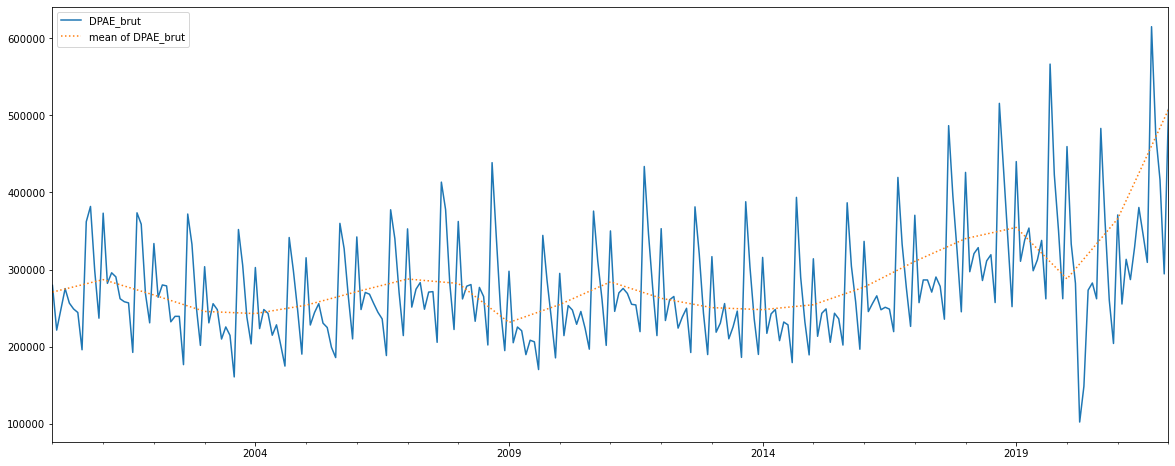

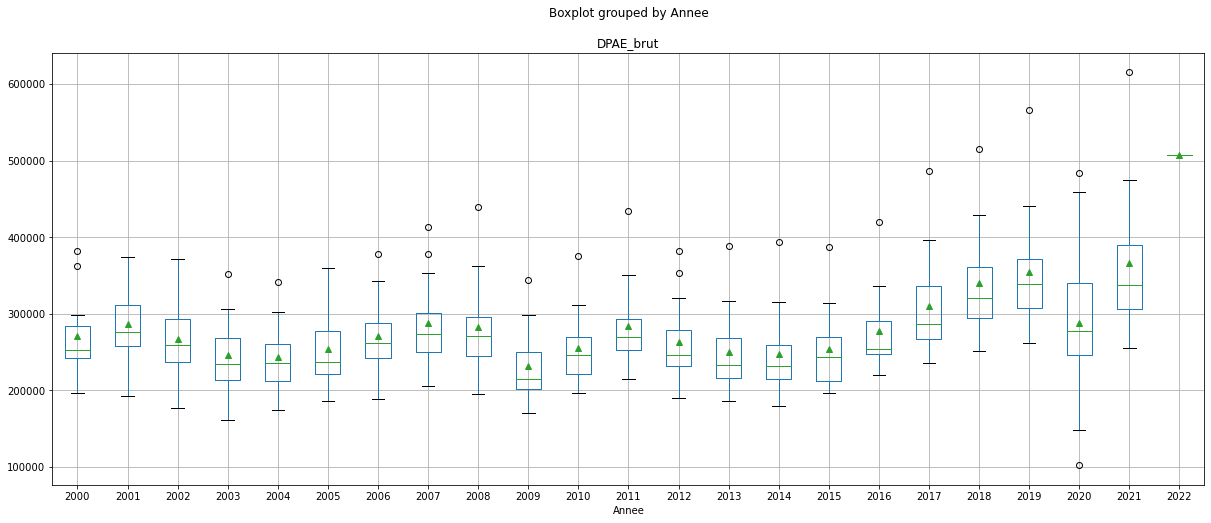

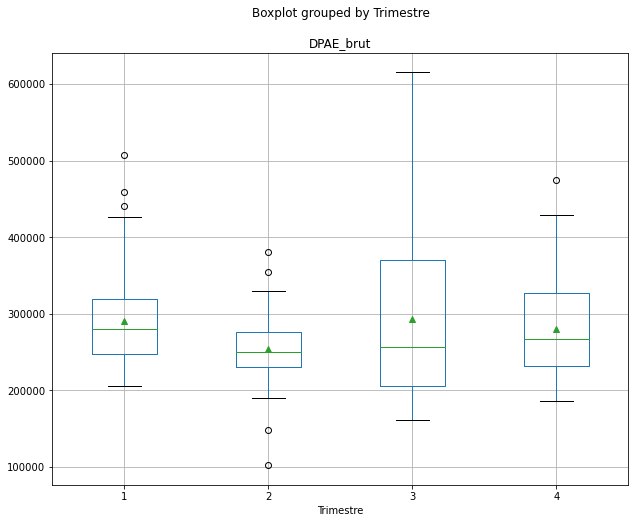

In [87]:
# Pour CDI : Representation du DPAE_brut et de l'evolution de sa moyenne
ax= CDI.plot(y=["DPAE_brut"],style='-')
CDI.resample('BA').mean().plot(y=["DPAE_brut"],style=':',ax=ax,figsize=(20,8))
plt.legend(["DPAE_brut","mean of DPAE_brut"])

CDI.boxplot(column=["DPAE_brut"], by='Annee', figsize=(20,8),showmeans=True)
CDI.boxplot(column=["DPAE_brut"], by='Trimestre', figsize=(10,8),showmeans=True)


<AxesSubplot:title={'center':'DPAE_brut'}, xlabel='Trimestre'>

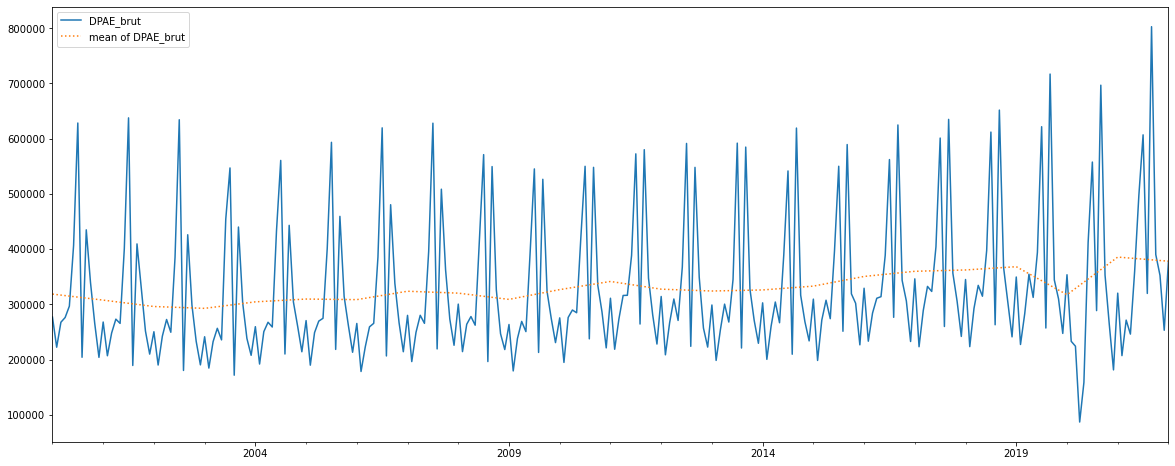

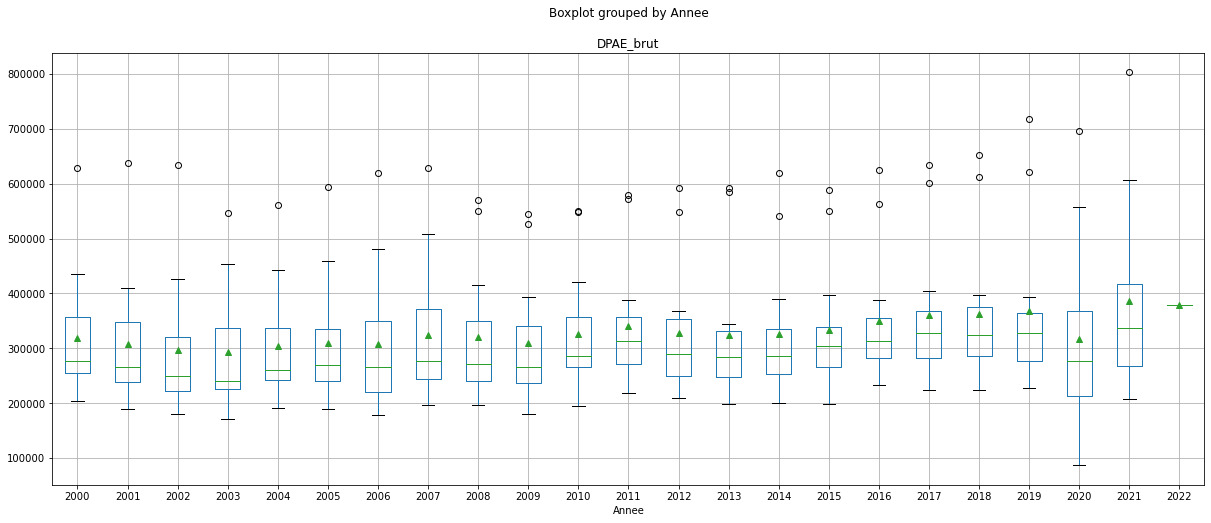

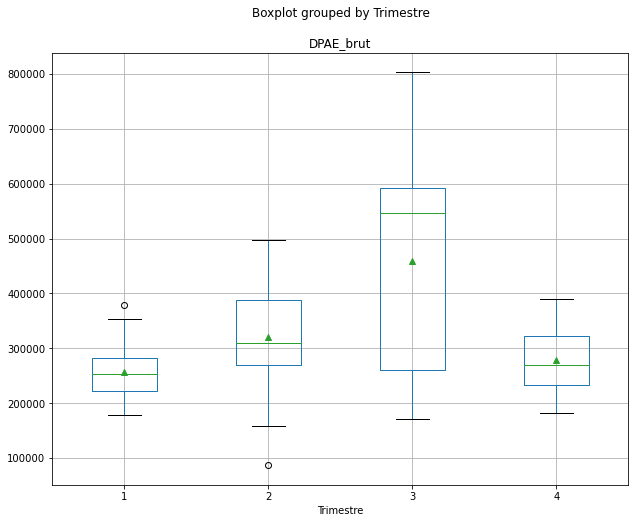

In [88]:
# Pour CDD : Representation du DPAE_brut et de l'evolution de sa moyenne
ax= CDD.plot(y=["DPAE_brut"],style='-')
CDD.resample('BA').mean().plot(y=["DPAE_brut"],style=':',ax=ax,figsize=(20,8))
plt.legend(["DPAE_brut","mean of DPAE_brut"])

CDD.boxplot(column=["DPAE_brut"], by='Annee', figsize=(20,8), showmeans=True)
CDD.boxplot(column=["DPAE_brut"], by='Trimestre', figsize=(10,8), showmeans=True)


<h3> Observation : </h3>
On observe que la moyenne de CDD au fil des années reste quasiment constante entre 2000 et 2021 alors que la moyenne de CDI augmente legerement , on conclue alors que la tendance est legèrement croissante pour le nombre de CDI et constante pour le nombre de CDD pour cette durée précise.

<h2>Question 1 : 2</h2>
<h3>Q1 : 2 : 1</h3>
Nettoyage de données 

In [89]:
EES = pd.read_excel('Tableau_Emploi-Salarie-Trimestre-National_09032022.xlsx',index_col=0)

#EES.head(5)

In [90]:
#On interprete les (O) comme des NA
EES_A = EES.replace("(O)",pd.NA)

#EES_A.head()

In [91]:
#On retire des colonnes jugées non pertinentes
EES_NET = EES_A.drop(["idBank","Dernière mise à jour", "Période"],axis=1)

#EES_NET.head(5)

In [92]:
#On supprime les secteurs comportant des valeurs NA
EES_NET=EES_NET.dropna(axis=0)

#EES_NET.head(5)

In [93]:
#On transpose le DF pour avoir les dates commes index , et les secteurs comme colonnes
EES_NET=EES_NET.T.copy()

EES_NET.head(5)


Libellé,"Emplois salariés trimestriels - Industrie - Sections B, C, D et E - CVS",Emplois salariés trimestriels - Construction - Section F - CVS,"Emplois salariés trimestriels - Tertiaire marchand - Sections G, H, I, J, K, L, M, N, R, S, T - CVS","Emplois salariés trimestriels - Industries extractives, énergie, eau, gestion des déchets et dépollution - A17 : DE - CVS","Emplois salariés trimestriels - Fabrication de denrées alimentaires, de boissons et de produits à base de tabac - A17 : C1 - CVS",Emplois salariés trimestriels - Cokéfaction et raffinage - A17 : C2 - CVS,"Emplois salariés trimestriels - Fabrication d'équipements électriques, électroniques, informatiques, fabrication de machines - A17 : C3 - CVS",Emplois salariés trimestriels - Fabrication de matériels de transport - A17 : C4 - CVS,Emplois salariés trimestriels - Fabrication d'autres produits industriels - A17 : C5 - CVS,Emplois salariés trimestriels - Construction - A17 : FZ - CVS,...,Emplois salariés trimestriels - Autres activités de services (hors activités extra-territoriales) - A17 : RU - CVS,"Emplois salariés trimestriels - Fabrication de denrées alimentaires, de boissons et de produits à base de tabac - A38 : CA - CVS",Emplois salariés trimestriels - Cokéfaction et raffinage - A38 : CD - CVS,Emplois salariés trimestriels - Fabrication de matériels de transport - A38 : CL - CVS,Emplois salariés trimestriels - Construction - A38 : FZ - CVS,"Emplois salariés trimestriels - Commerce, réparation d'automobiles et de motocycles - A38 : GZ - CVS",Emplois salariés trimestriels - Transports et entreposage - A38 : HZ - CVS,Emplois salariés trimestriels - Hébergement et restauration - A38 : IZ - CVS,Emplois salariés trimestriels - Activités financières et d'assurance - A38 : KZ - CVS,Emplois salariés trimestriels - Activités immobilières - A38 : LZ - CVS
1970-T4,5447.9,1760.3,5349.1,293.2,507.1,36.5,781.6,558.5,3271,1760.3,...,515.4,507.1,36.5,558.5,1760.3,1789.6,997.5,452.8,383.3,114.6
1971-T1,5466.3,1759.6,5340.5,293.5,508.2,36,783.7,566.1,3278.8,1759.6,...,505.5,508.2,36,566.1,1759.6,1789.4,994,450.9,387.4,114.5
1971-T2,5494.7,1764.1,5375.2,293.9,514.3,35.7,788.2,570.6,3292,1764.1,...,505.9,514.3,35.7,570.6,1764.1,1804.4,996.3,452.4,394.3,115.8
1971-T3,5529.1,1767.8,5428.6,294.2,523,35.2,794.4,574.3,3308,1767.8,...,511.9,523,35.2,574.3,1767.8,1821.6,1002.4,454,401.6,117.5
1971-T4,5534.1,1761.1,5483.5,294.3,514.5,34.8,798.5,575.4,3316.6,1761.1,...,519.8,514.5,34.8,575.4,1761.1,1840.1,1008.5,455.5,410.4,119.5


<h3>Q1 : 2 : 2</h3>
Création d'une seule série temporelle qui somme l’ensemble de secteurs

In [94]:
#On ajoute un ligne en bas du DF qui represente le Total de chaque colonne
EES_NET['total'] = EES_NET.sum(numeric_only=False, axis=1)
EES_NET['total']

1970-T4    31714.6
1971-T1    31738.9
1971-T2    31915.9
1971-T3    32148.4
1971-T4    32277.1
            ...   
2020-T4    42714.6
2021-T1    43039.4
2021-T2    43779.3
2021-T3    44044.2
2021-T4    44320.6
Name: total, Length: 205, dtype: object

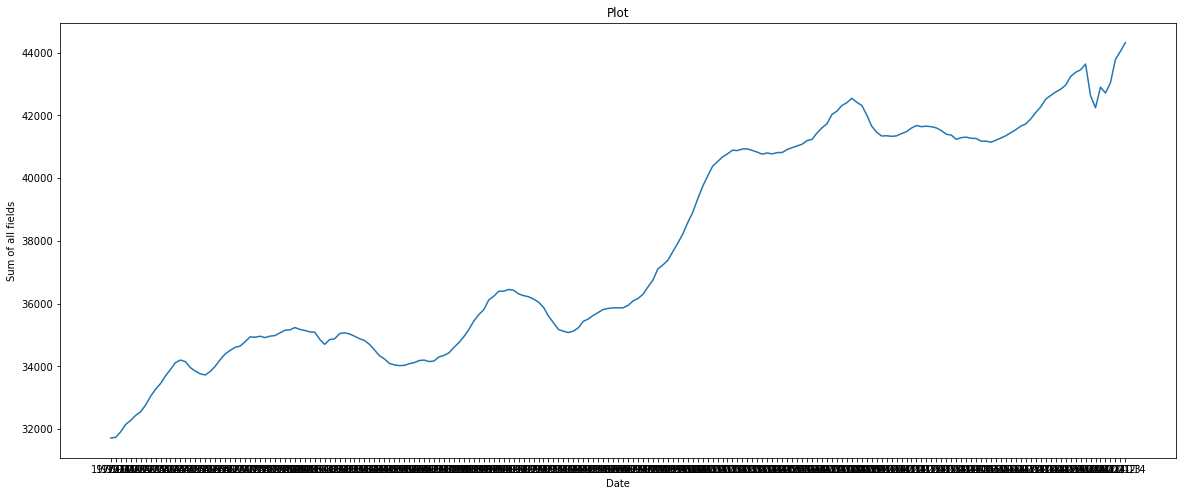

In [95]:
plt.figure(figsize=(20, 8))
plt.plot(EES_NET['total'])
plt.xlabel("Date")
plt.ylabel("Sum of all fields")
plt.title("Plot")

plt.show()

<p>Observation : On remarque là une hausse des Emplois salariés de trimestre en trimestre suivant les années de tous les secteurs confondus, de 32000 en 1970 à 44000 en 2021.</p>

<h3>Q1 : 2 : 3</h3>
Etude de 2-5 secteurs :<br>
Dans notre cas, on en traite 4

In [96]:
#Selection de 4 secteurs (qui sont les 4 premières colonnes)
EES_NET[EES_NET.columns[:4]]

Libellé,"Emplois salariés trimestriels - Industrie - Sections B, C, D et E - CVS",Emplois salariés trimestriels - Construction - Section F - CVS,"Emplois salariés trimestriels - Tertiaire marchand - Sections G, H, I, J, K, L, M, N, R, S, T - CVS","Emplois salariés trimestriels - Industries extractives, énergie, eau, gestion des déchets et dépollution - A17 : DE - CVS"
1970-T4,5447.9,1760.3,5349.1,293.2
1971-T1,5466.3,1759.6,5340.5,293.5
1971-T2,5494.7,1764.1,5375.2,293.9
1971-T3,5529.1,1767.8,5428.6,294.2
1971-T4,5534.1,1761.1,5483.5,294.3
...,...,...,...,...
2020-T4,3110.2,1462.5,12231.7,376.9
2021-T1,3117.4,1493.5,12329.9,378.9
2021-T2,3120.8,1494.5,12606.7,380.1
2021-T3,3126.3,1493,12715.9,380.5


In [97]:
secteur1 = EES_NET[EES_NET.columns[0]].astype(float)
secteur2 = EES_NET[EES_NET.columns[1]].astype(float)
secteur3 = EES_NET[EES_NET.columns[2]].astype(float)
secteur4 = EES_NET[EES_NET.columns[3]].astype(float)

secteurs=[secteur1,secteur2,secteur3,secteur4]


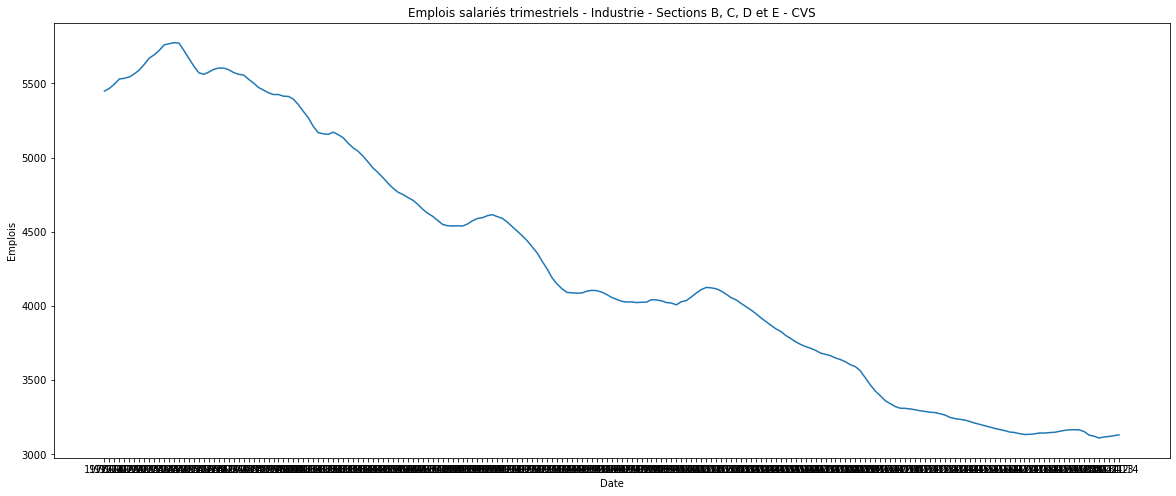

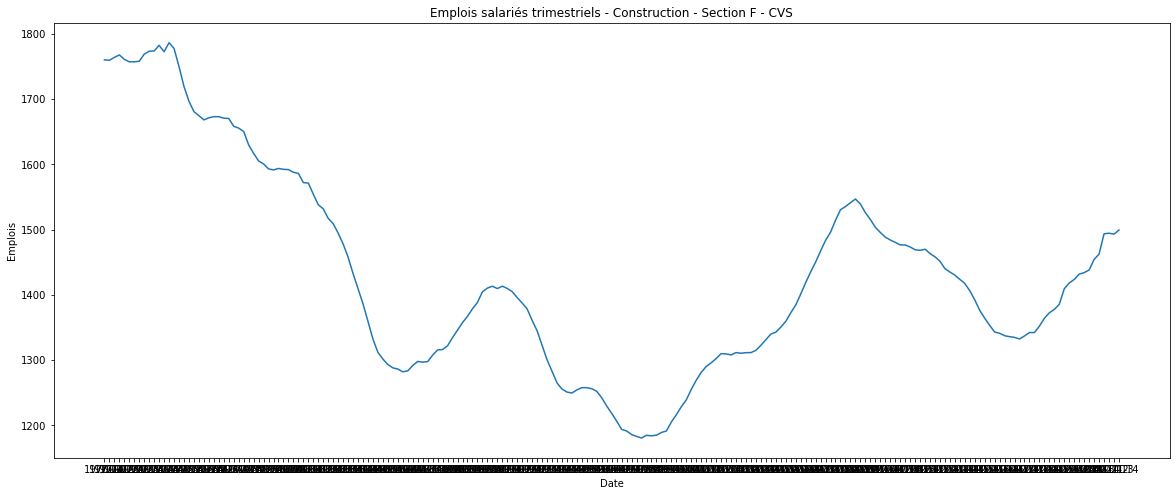

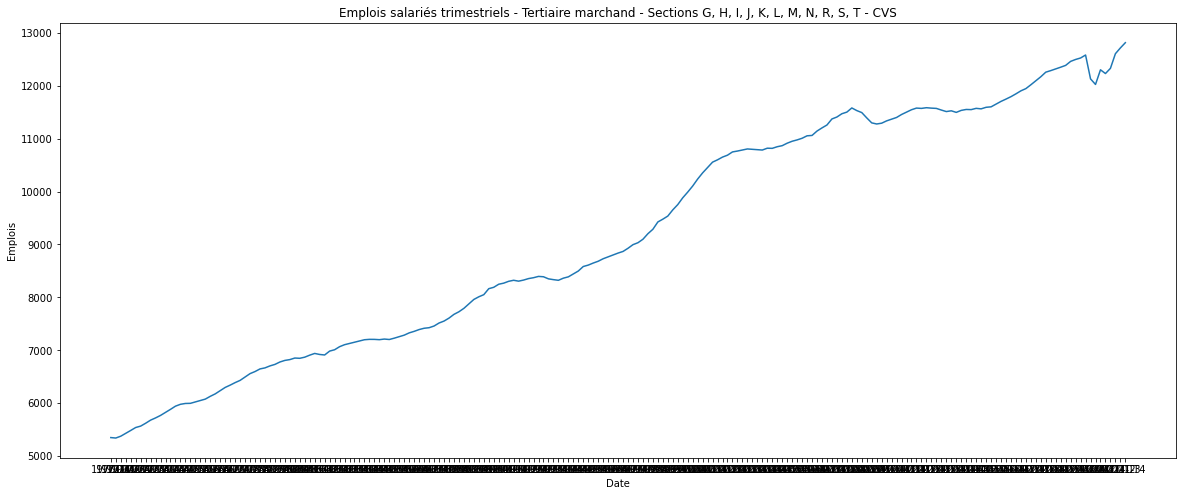

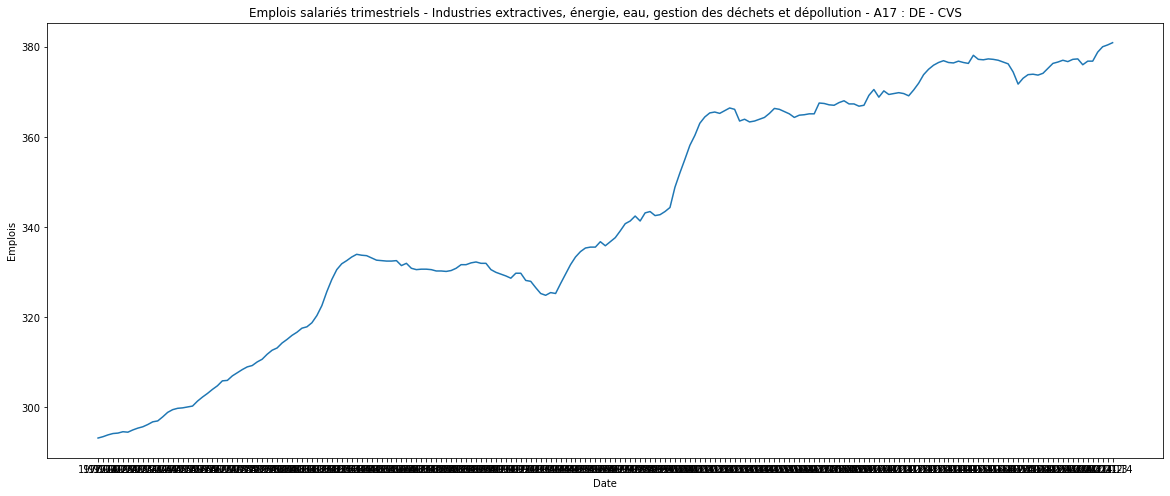

In [98]:
#Plot par secteur
for secteur in secteurs :
    plt.figure(figsize=(20, 8))
    plt.plot(secteur.index, secteur.values)
    plt.xlabel("Date")
    plt.ylabel("Emplois")
    plt.title(secteur.name)
    plt.show()

Dans notre cas on remarque que :
<ul>
    <li>Le premier secteur présente une baisse au niveau du nombre d'Emplois salariés trimestriels</li>
    <li>Le deuxieme secteur montre une oscillation, mais par rapport aux années 1970-1980, les valeurs des dernières années sont toutes inférieurs donc globalement on observe une baisse.</li>
    <li>Le troisième et le dernier secteur montrent une hausse du nombre d'Emplois salariés trimestriels au fil des années</li>
</ul>

<h3>Q1 : 2 : 4</h3>
Statistiques classiques 

In [99]:
#Description des secteurs
for secteur in secteurs :
    print(f"\npour {secteur.name} :\n\n{secteur.describe()}")


pour Emplois salariés trimestriels - Industrie - Sections B, C, D et E - CVS :

count     205.000000
mean     4275.734146
std       854.460778
min      3110.200000
25%      3515.600000
50%      4091.300000
75%      5042.600000
max      5774.000000
Name: Emplois salariés trimestriels - Industrie - Sections B, C, D et E - CVS, dtype: float64

pour Emplois salariés trimestriels - Construction - Section F - CVS :

count     205.000000
mean     1431.441951
std       158.907811
min      1180.400000
25%      1311.400000
50%      1406.300000
75%      1517.200000
max      1786.600000
Name: Emplois salariés trimestriels - Construction - Section F - CVS, dtype: float64

pour Emplois salariés trimestriels - Tertiaire marchand - Sections G, H, I, J, K, L, M, N, R, S, T - CVS :

count      205.000000
mean      9173.452683
std       2236.657959
min       5340.500000
25%       7198.900000
50%       8837.400000
75%      11409.800000
max      12815.100000
Name: Emplois salariés trimestriels - Tertiaire

<h1>Question 2 : Saisonnalité et corrélations</h1>
<h2>Q2 : 1</h2>
Evaluation de la saisonnalité sur DPAE

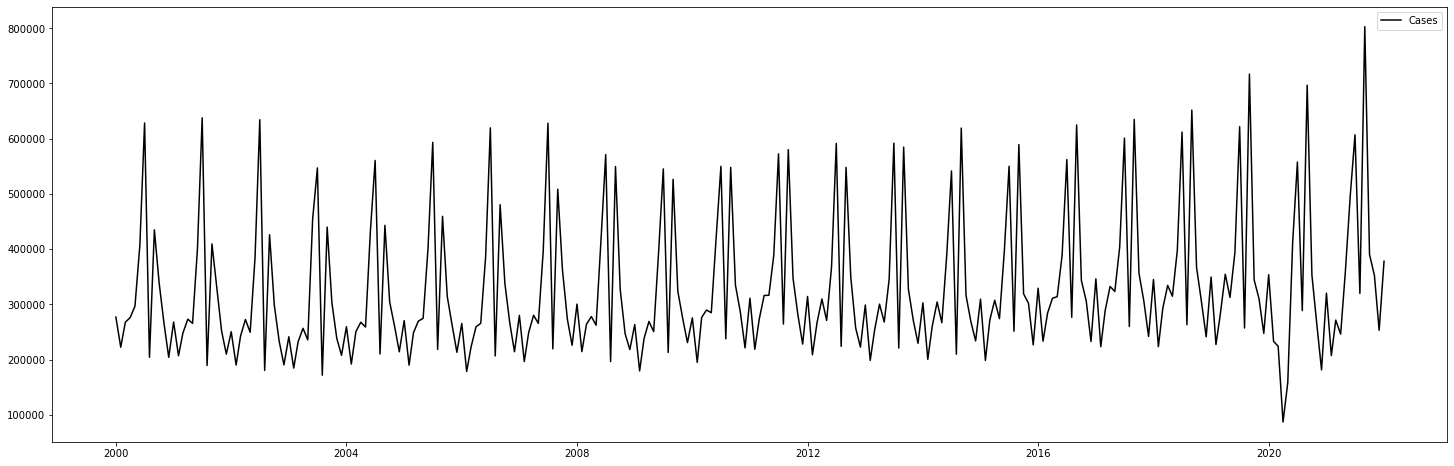

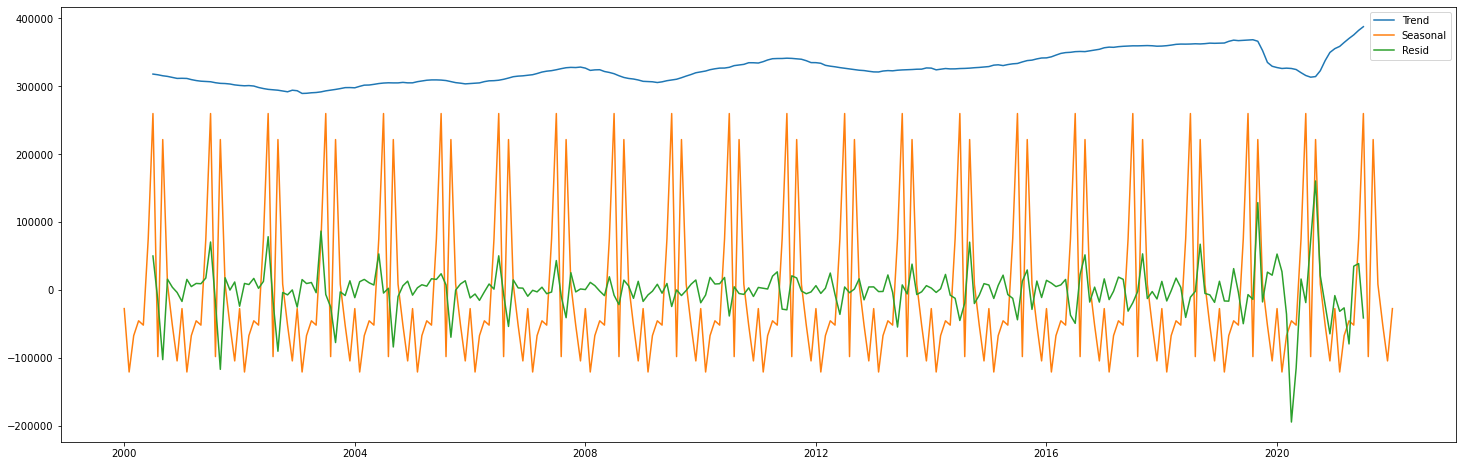

In [100]:
#Saisonalité des CDD
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(CDD["DPAE_brut"], period=12) 

plt.figure(figsize=(25,8))
plt.plot(CDD.index, CDD["DPAE_brut"], 'k')
plt.legend(['Cases'])
plt.figure(figsize=(25,8))
plt.plot(CDD.index,decomposition.trend)
plt.plot(CDD.index,decomposition.seasonal)
plt.plot(CDD.index,decomposition.resid)
plt.legend(['Trend', 'Seasonal', 'Resid'])

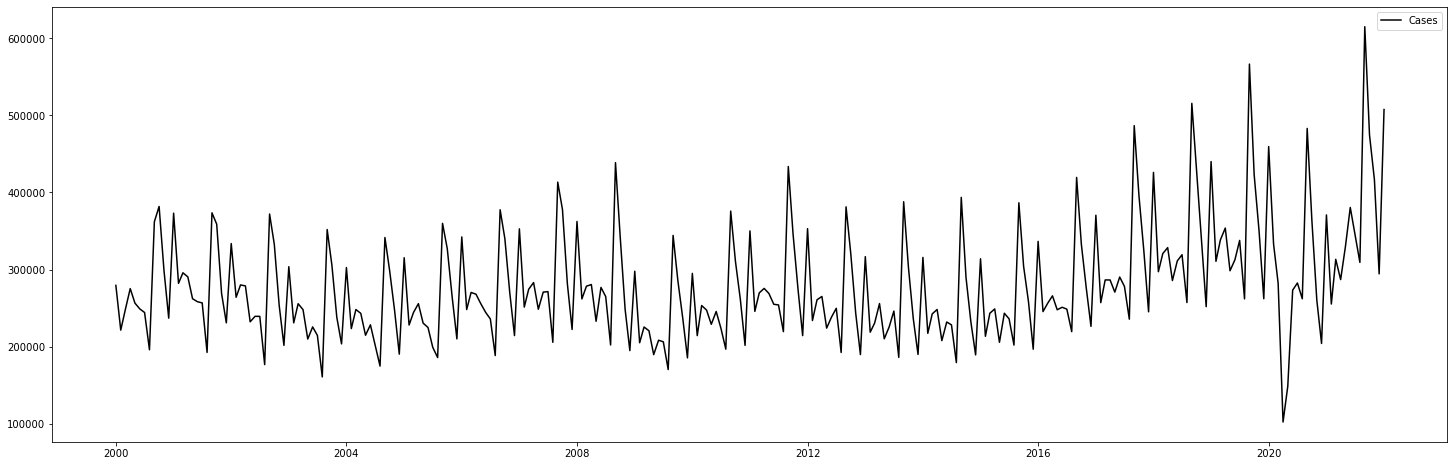

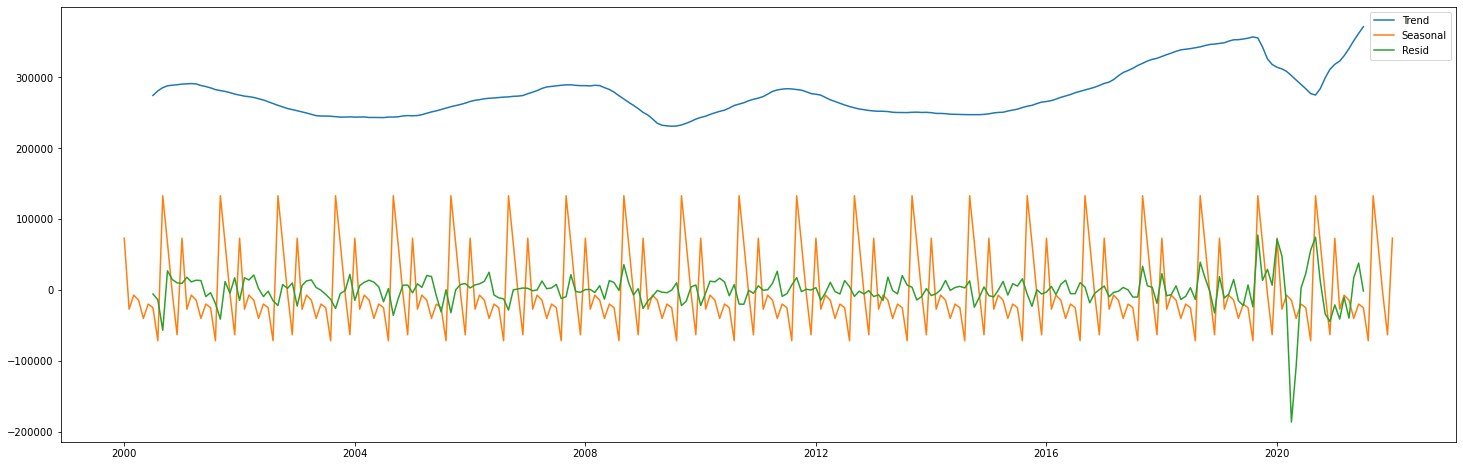

In [101]:
#Saisonalité des CDI
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(CDI["DPAE_brut"], period=12)

plt.figure(figsize=(25,8))
plt.plot(CDI.index, CDI["DPAE_brut"], 'k')
plt.legend(['Cases'])
plt.figure(figsize=(25,8))
plt.plot(CDI.index,decomposition.trend)
plt.plot(CDI.index,decomposition.seasonal)
plt.plot(CDI.index,decomposition.resid)
plt.legend(['Trend', 'Seasonal', 'Resid'])


Observation : On peut clairement voir que le CDI et CDD suivent une saisonnalité

<h2>Q2 : 2</h2>
Evaluation de la saisonnalité sur DPAE

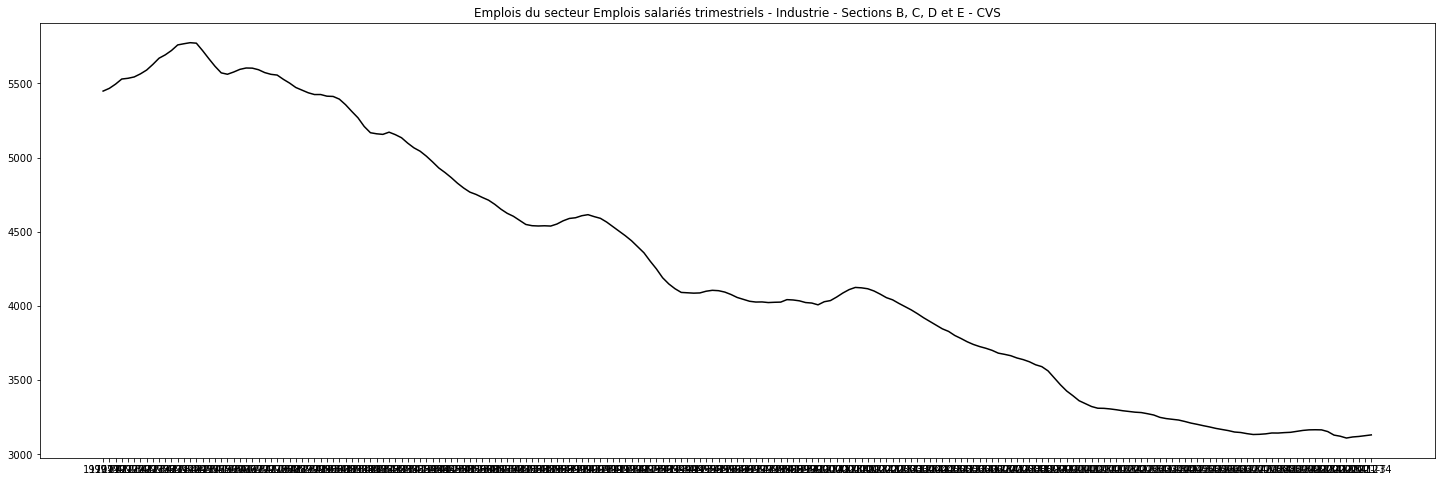

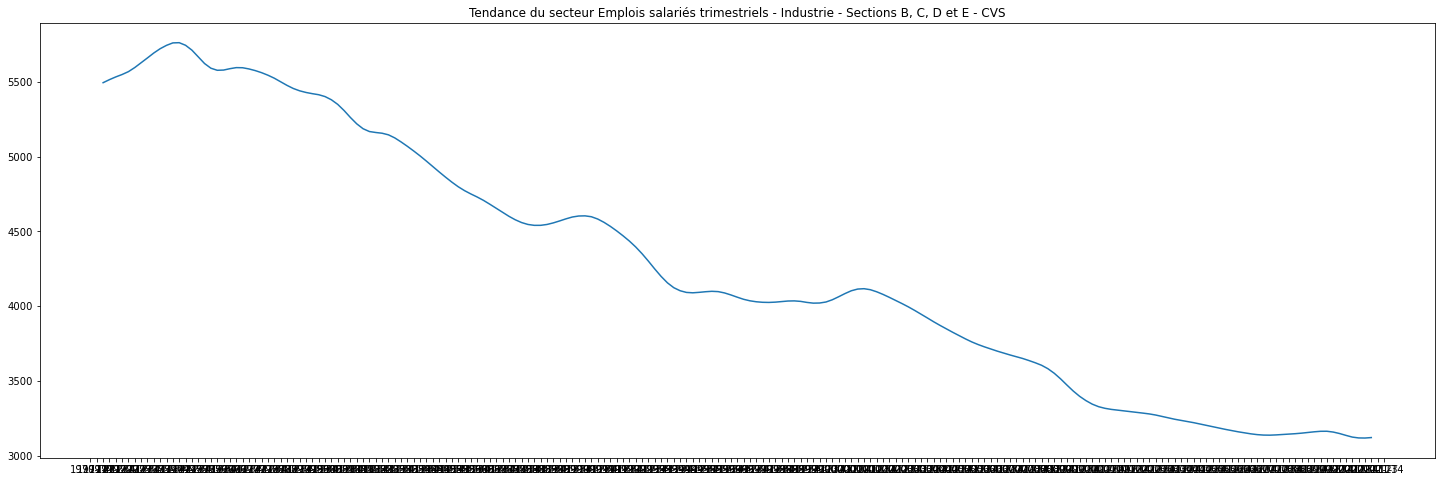

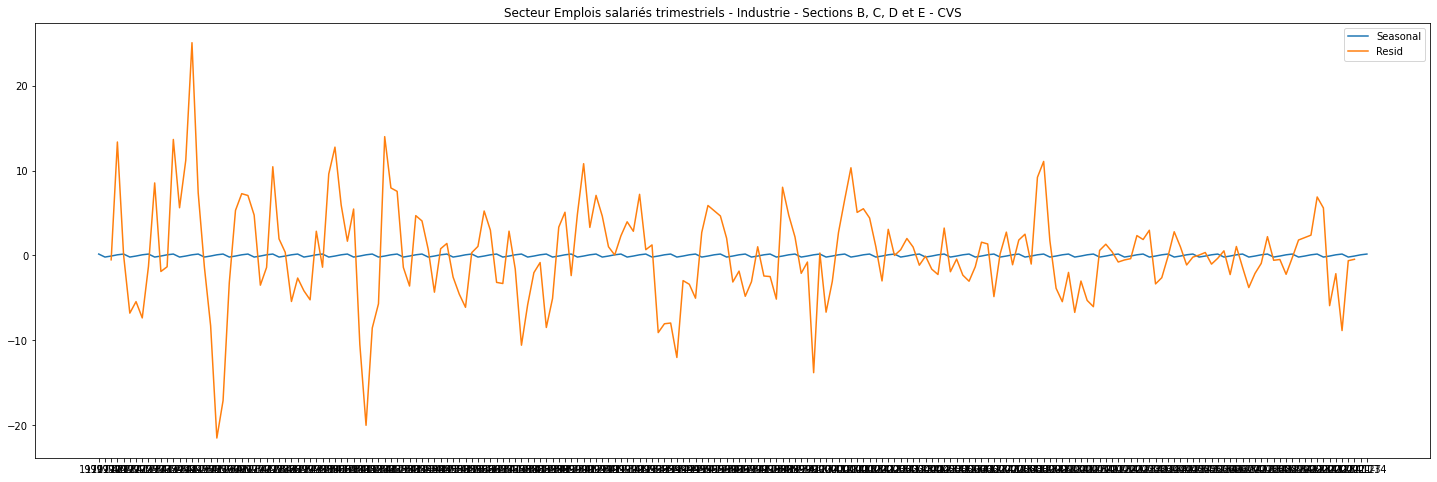

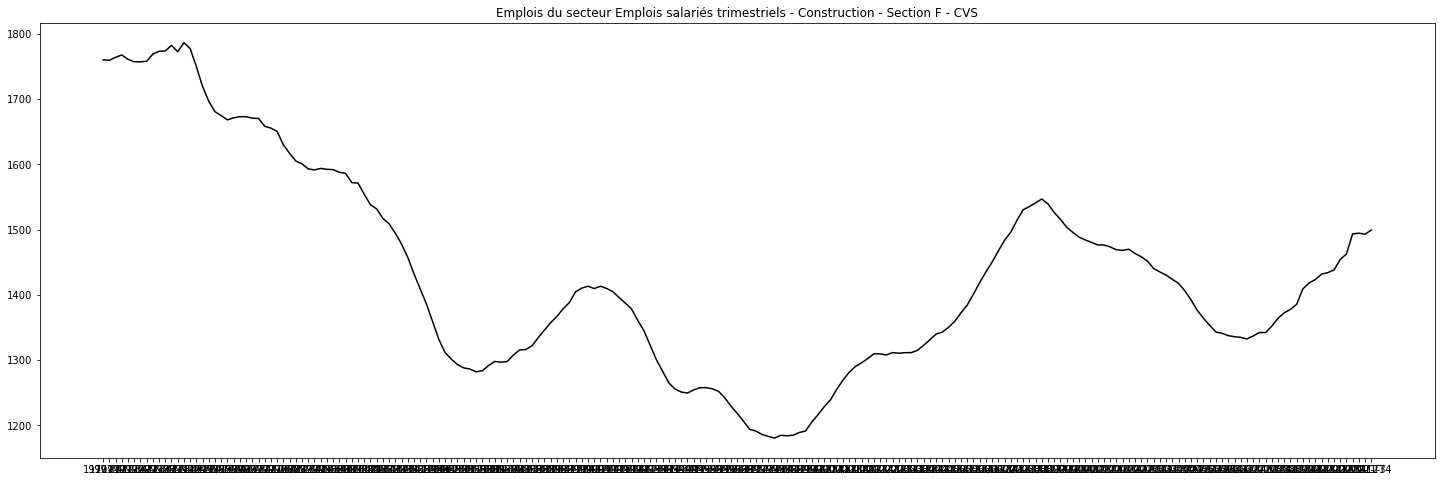

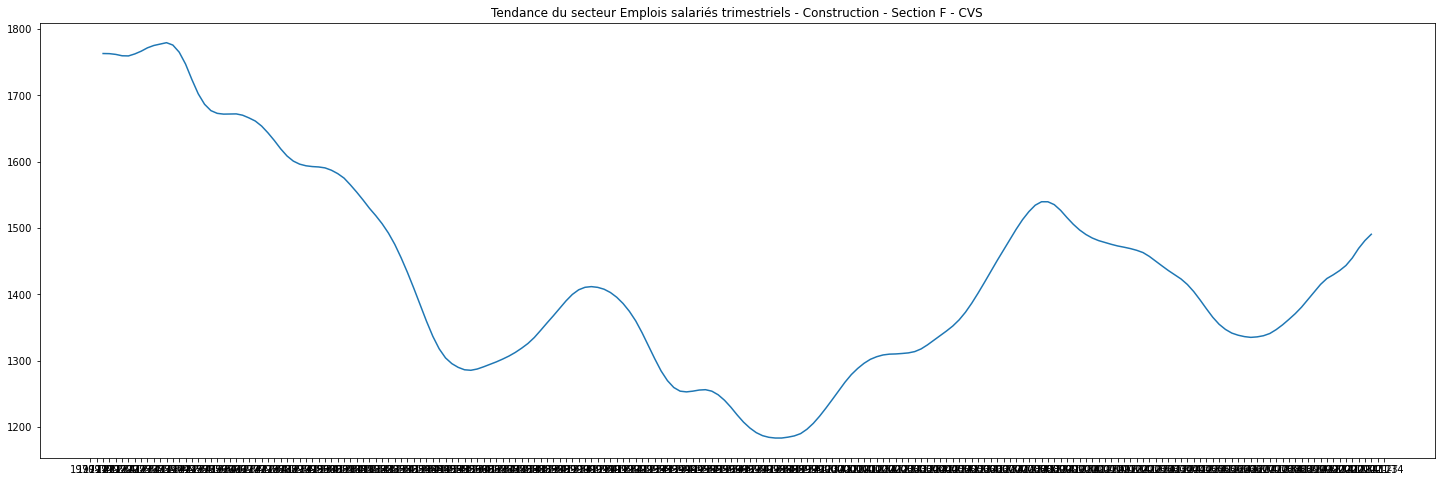

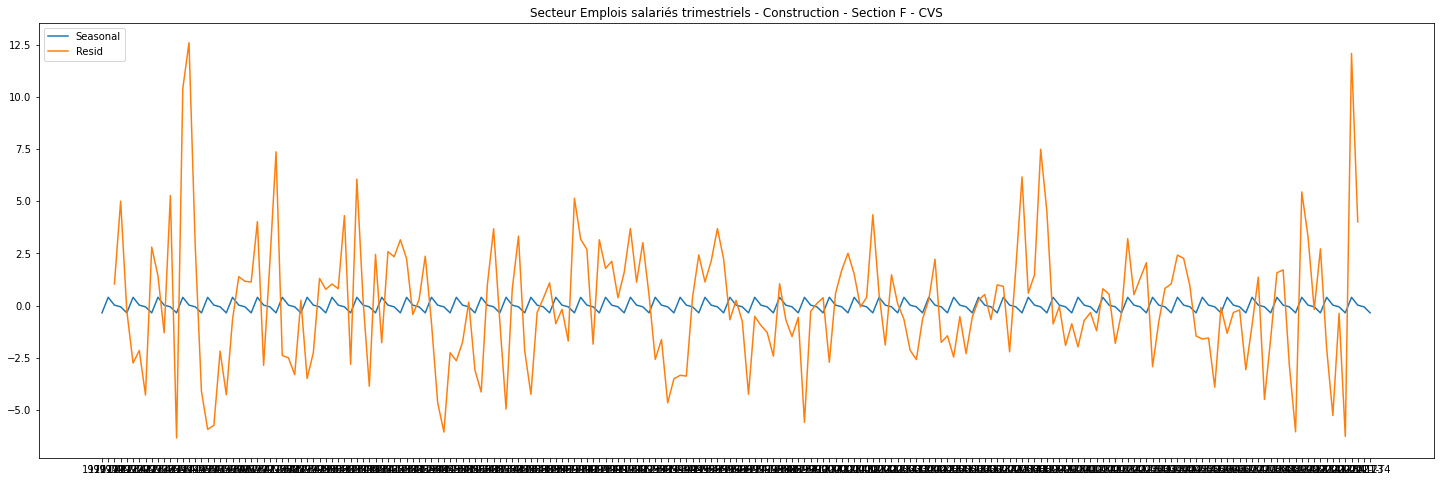

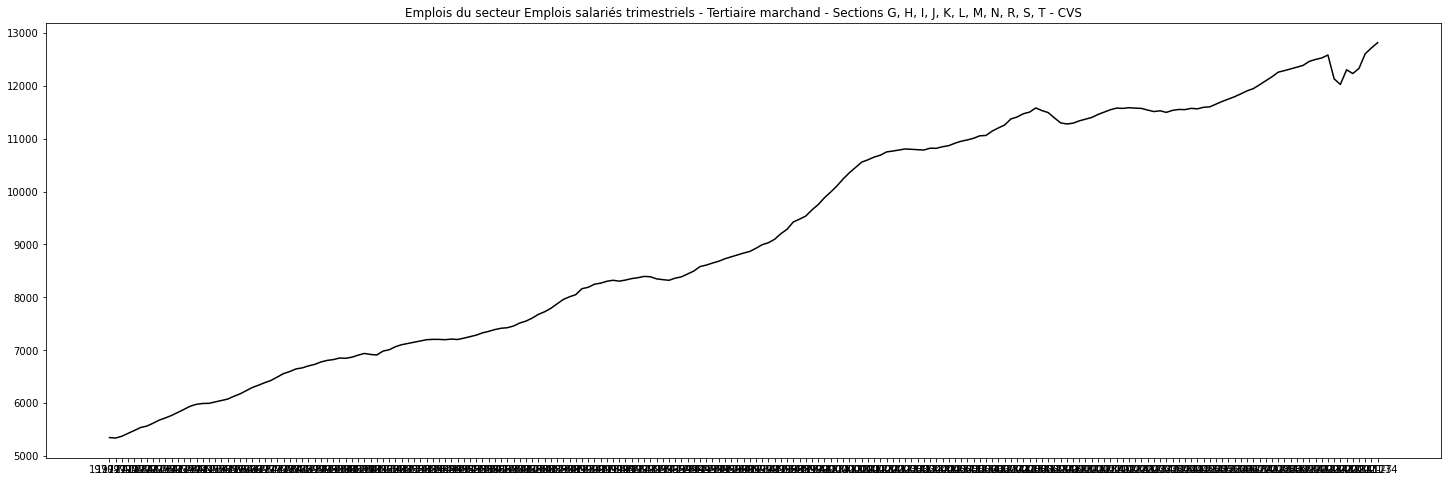

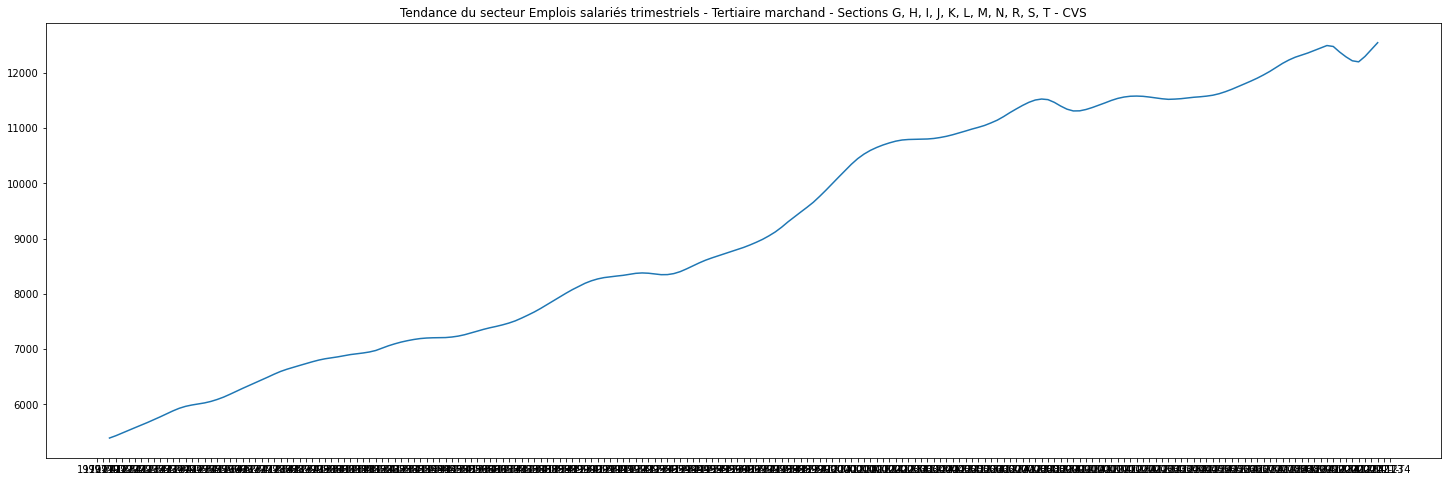

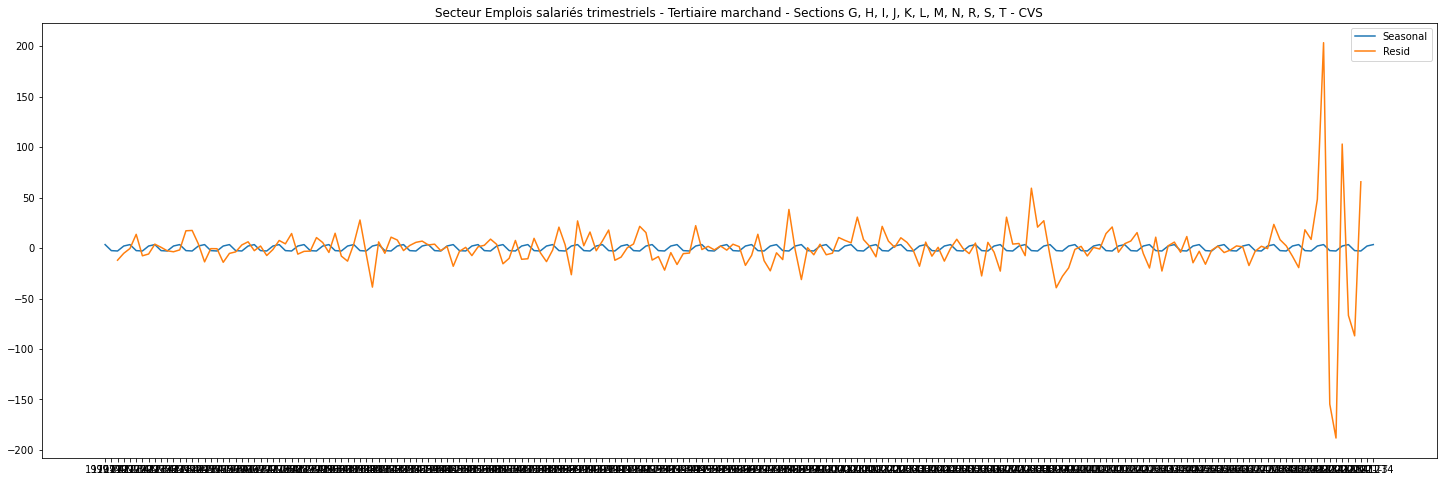

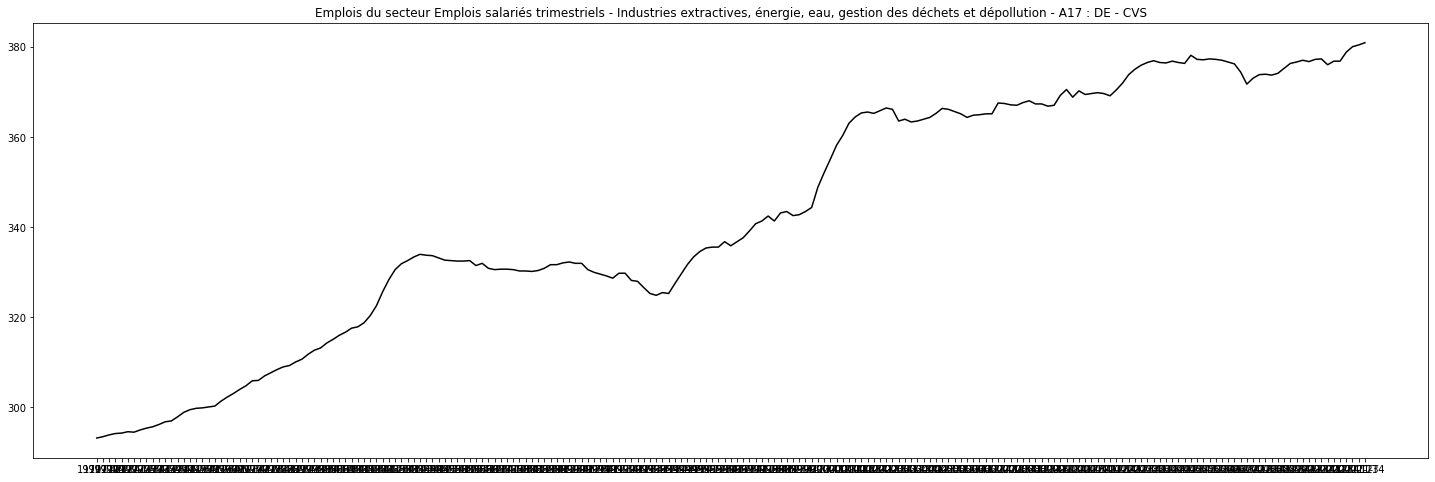

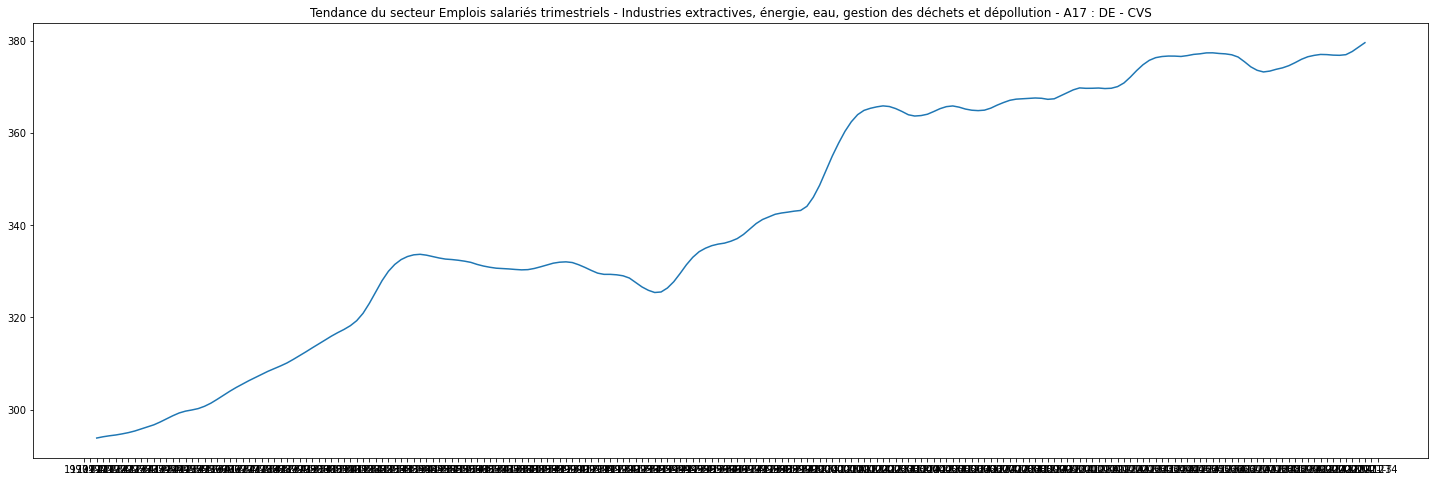

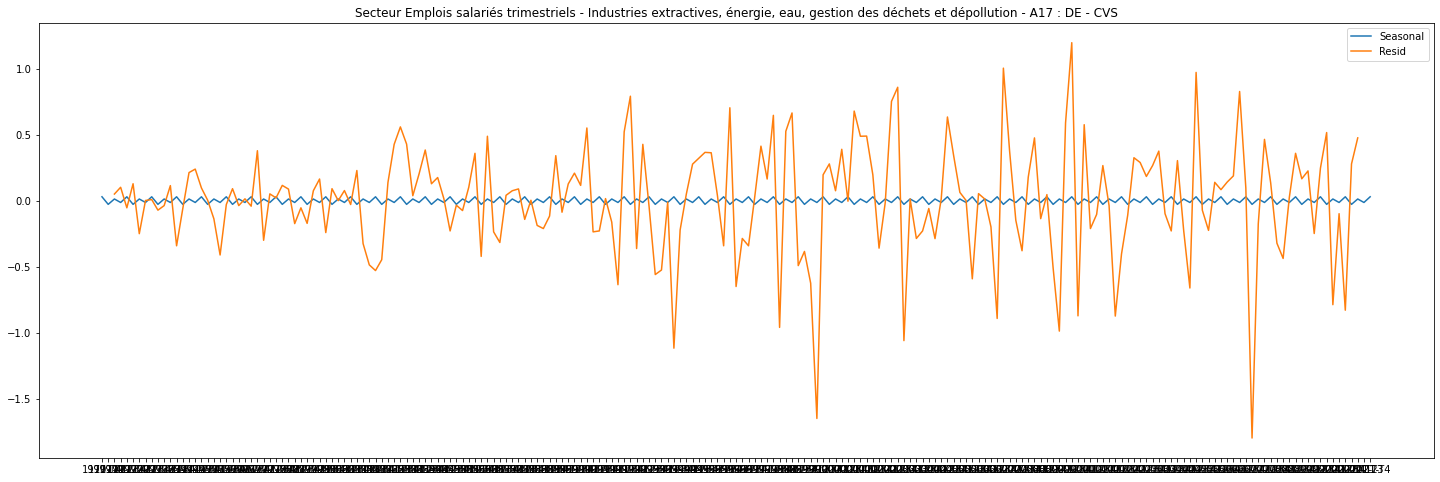

In [102]:
#On representera Trend et (Seasonal,Resid) separement vu la difference d'echelles. On aura ainsi une meilleur visibilité des données

for secteur in secteurs :
    decomposition = seasonal_decompose( secteur.values,period=4)
    #Emplois
    plt.figure(figsize=(25,8))
    plt.plot(secteur.index,secteur.values , 'k')
    plt.title("Emplois du secteur "+secteur.name)
    plt.show()

    # trend
    plt.figure(figsize=(25,8))
    plt.plot(secteur.index,decomposition.trend)
    plt.title("Tendance du secteur "+secteur.name)
    plt.show()

    #seasonal + resid
    plt.figure(figsize=(25,8))
    plt.title("Secteur "+secteur.name)
    plt.plot(secteur.index,decomposition.seasonal)
    plt.plot(secteur.index,decomposition.resid)
    plt.legend(['Seasonal', 'Resid'])
    plt.show()

Observation : On peut clairement voir que les valeurs de secteurs ne suivent pas une saisonnalité

<h2>Q2 : 3</h2>
Calcule de la corrélation entre les séries de DPAE et les séries sélectionnées d’EESSA

In [103]:
#On preleve les valeurs prisent entre 2000-2021
CDD_F=CDD[(CDD.index >= pd.Timestamp('2000')) & (CDD.index < pd.Timestamp('2022'))]

#On calcule une moyenne pour chaque 3 mois successifs
#pour representer la valeur du trimestre pour cette année
dd=pd.DataFrame(columns=list(['Trimestre',"DPAE_brut"]))
for i in range(4*(2022-2000)):
    s=0
    for j in range(3):
        s+=CDD_F.iloc[i*3+j]["DPAE_brut"]
    s/=3
    a=pd.DataFrame(data={"Trimestre" : [str(CDD_F.iloc[i*3]["Annee"])+"-T"+str(CDD_F.iloc[i*3]["Trimestre"])] ,"DPAE_brut":[s]})
    dd = pd.concat([dd , a])
dd.index = dd["Trimestre"]
dd=dd["DPAE_brut"].astype(float)
dd

Trimestre
2000-T1    255579.000000
2000-T2    326375.666667
2000-T3    422428.333333
2000-T4    269664.666667
2001-T1    240933.333333
               ...      
2020-T4    266019.666667
2021-T1    266215.666667
2021-T2    367567.333333
2021-T3    576460.666667
2021-T4    331847.333333
Name: DPAE_brut, Length: 88, dtype: float64

In [104]:
#Ramener les secteurs dur la periode 2000-2021

#ici on commence avec 1970-T4, et pour chaque année en a 4 valeurs,
#pour arriver au debut des valeurs de 2000 on declade de 4*29 + 1 
secteur1_c = secteur1 [4*29 + 1 :]
secteur2_c = secteur2 [4*29 + 1 :]
secteur3_c = secteur3 [4*29 + 1 :]
secteur4_c = secteur4 [4*29 + 1 :]

secteur_c=[secteur1_c,secteur2_c,secteur3_c,secteur4_c]

secteur1_c

2000-T1    4036.3
2000-T2    4060.2
2000-T3    4087.4
2000-T4    4110.2
2001-T1    4124.9
            ...  
2020-T4    3110.2
2021-T1    3117.4
2021-T2    3120.8
2021-T3    3126.3
2021-T4    3131.3
Name: Emplois salariés trimestriels - Industrie - Sections B, C, D et E - CVS, Length: 88, dtype: float64

In [105]:
######################## Correlation avec CDD ####################################
for secteur in secteur_c:
    print(f"\nCorrelation entre CDD et {secteur.name} :\n\t",
    np.corrcoef(secteur.values,dd.values)[0,1])


Correlation entre CDD et Emplois salariés trimestriels - Industrie - Sections B, C, D et E - CVS :
	 -0.2176818444509718

Correlation entre CDD et Emplois salariés trimestriels - Construction - Section F - CVS :
	 0.06846521817647509

Correlation entre CDD et Emplois salariés trimestriels - Tertiaire marchand - Sections G, H, I, J, K, L, M, N, R, S, T - CVS :
	 0.2673956856229555

Correlation entre CDD et Emplois salariés trimestriels - Industries extractives, énergie, eau, gestion des déchets et dépollution - A17 : DE - CVS :
	 0.21259385584006577


<h3>Interpretation :</h3>
<ul>
    <li>CDD et Emplois salariés trimestriels - Industrie - Sections B, C, D et E - CVS :</li>
    <p>On a un degré de correlation qui est bas (Low degree Correlation)</p>
    <li>CDD et Emplois salariés trimestriels - Construction - Section F - CVS :</li>
    <p>On a un degre de correlation qui est bas (Low degree Correlation)</p>
    <li>CDD et Emplois salariés trimestriels - Tertiaire marchand - Sections G, H, I, J, K, L, M, N, R, S, T - CVS :</li>
    <p>On a un degre de correlation qui est bas (Low degree Correlation)</p>
    <li>CDD et Emplois salariés trimestriels - Industries extractives, énergie, eau, gestion des déchets et dépollution - A17 : DE - CVS :</li>
    <p>On a un degre de correlation qui est bas (Low degree Correlation)<p>  
</ul>
<h5>On peut donc pour le moment conclure que le nombre de CDD n'est pas corrélé aux 4 secteurs étudiés.</h5>

In [106]:
######################## Correlation avec CDI ####################################
#On deduit un DataFrame de forme adequate
CDI_F=CDI[(CDI.index >= pd.Timestamp('2000')) & (CDI.index < pd.Timestamp('2022'))]
di=pd.DataFrame(columns=list(['Trimestre',"DPAE_brut"]))
for i in range(4*(2022-2000)):
    s=0
    for j in range(3):
        s+=CDI_F.iloc[i*3+j]["DPAE_brut"]
    s/=3
    a=pd.DataFrame(data={"Trimestre" : [str(CDI_F.iloc[i*3]["Annee"])+"-T"+str(CDI_F.iloc[i*3]["Trimestre"])] ,"DPAE_brut":[s]})
    di = pd.concat([di , a])
di.index = di["Trimestre"]
di=di["DPAE_brut"].astype(float)

for secteur in secteur_c:
    print(f"\nCorrelation entre CDI et {secteur.name} :\n\t",
    np.corrcoef(secteur.values,di.values)[0,1])


Correlation entre CDI et Emplois salariés trimestriels - Industrie - Sections B, C, D et E - CVS :
	 -0.3129770742603222

Correlation entre CDI et Emplois salariés trimestriels - Construction - Section F - CVS :
	 0.10907605087797306

Correlation entre CDI et Emplois salariés trimestriels - Tertiaire marchand - Sections G, H, I, J, K, L, M, N, R, S, T - CVS :
	 0.6031028726461964

Correlation entre CDI et Emplois salariés trimestriels - Industries extractives, énergie, eau, gestion des déchets et dépollution - A17 : DE - CVS :
	 0.35641392299492974


<h3>Interpretation :</h3>
<ul>
    <li>CDI et Emplois salariés trimestriels - Industrie - Sections B, C, D et E - CVS :</li>
    <p>On a un degré modéré de correlation (Moderate degree correlation)</p>
    <li>CDI et Emplois salariés trimestriels - Construction - Section F - CVS :</li>
    <p>On a un degre de correlation qui est bas (Low degree Correlation)</p>
    <li>CDI et Emplois salariés trimestriels - Tertiaire marchand - Sections G, H, I, J, K, L, M, N, R, S, T - CVS :</li>
    <p>On a un haut degre de correlation (High degree correlation)</p>
    <li>CDI et Emplois salariés trimestriels - Industries extractives, énergie, eau, gestion des déchets et dépollution - A17 : DE - CVS :</li>
    <p>On a un degré modéré de correlation (Moderate degree correlation)</p>
</ul>
<h5> D'apres ces resultats, nous pouvons conclure qu'il existe une correlation entre le nombre de CDI et le secteur tertiare marchand, mais aussi une correlation modérée avec les secteurs de l'energie et celui de l'industrie.</h5>

<h1>Question 3: Prédiction par lissage exponentiel </h1>
<br>
Séparation des données en ensemble d’apprentissage et de test en vu d'effectuer des prédictions par lissage temporel

In [107]:
#On recupère le DPAE_brut, et on separe notre dataset en 80/20 pour generer le training et test sets
CDD = CDD["DPAE_brut"]
CDD_train = CDD[:212]
CDD_test = CDD[212:]
CDD_test

2017-09-01    634910
2017-10-01    356414
2017-11-01    305730
2017-12-01    241837
2018-01-01    344914
2018-02-01    223338
2018-03-01    292655
2018-04-01    334320
2018-05-01    314633
2018-06-01    397558
2018-07-01    611920
2018-08-01    262947
2018-09-01    651755
2018-10-01    366786
2018-11-01    304681
2018-12-01    241069
2019-01-01    349431
2019-02-01    227220
2019-03-01    282953
2019-04-01    354496
2019-05-01    312508
2019-06-01    393955
2019-07-01    621636
2019-08-01    257072
2019-09-01    716988
2019-10-01    344155
2019-11-01    309803
2019-12-01    247276
2020-01-01    353518
2020-02-01    232956
2020-03-01    224123
2020-04-01     86796
2020-05-01    158451
2020-06-01    412081
2020-07-01    557637
2020-08-01    288593
2020-09-01    696841
2020-10-01    352921
2020-11-01    263919
2020-12-01    181219
2021-01-01    320196
2021-02-01    207064
2021-03-01    271387
2021-04-01    246043
2021-05-01    359457
2021-06-01    497202
2021-07-01    606912
2021-08-01   

In [108]:
#Comme pour le CDD, on recupère le DPAE_brut, et on separe notre dataset en 80/20 pour generer le training et test sets
CDI = CDI["DPAE_brut"]
CDI_train = CDI[:212]
CDI_test = CDI[212:]

In [109]:
#secteur_train contiendra les training sets des 4 secteurs, et secteur_test les test sets.
secteur_train = []
secteur_test = []
for secteur in secteurs :
    secteur_train.append(secteur[:164])
    secteur_test.append(secteur[164:])

In [110]:
from statsmodels.tsa.api import ExponentialSmoothing, Holt

#Lissage exponentiel pour CDD
fit3 = ExponentialSmoothing(
    CDD_train,
    seasonal_periods = 12,
    trend = "add",
    seasonal = "add",
    use_boxcox = False,
    initialization_method = "estimated",
).fit()

/opt/anaconda3/envs/workshop/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


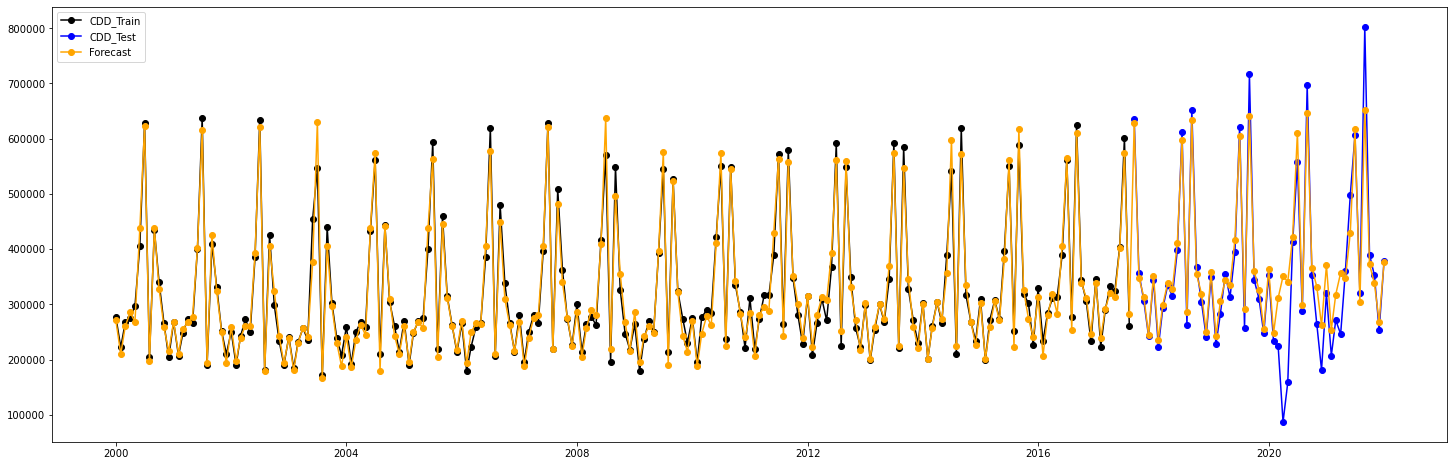

In [111]:
#Prediction CDD
# Noir      : training set
# Blue      : test set
# Yellow    : prediction

forecast_CDD = fit3.forecast(len(CDD_test))
full_curve = np.concatenate((fit3.fittedvalues, forecast_CDD))

plt.figure(figsize=(25,8))

plt.plot(CDD_train.index,CDD_train.values, marker="o", color="black", label='CDD_Train')
plt.plot(CDD_test.index,CDD_test.values, marker="o", color="blue", label='CDD_Test')
plt.plot(CDD.index,full_curve, marker="o", color="orange", label='Forecast')
plt.legend()
plt.show()

In [112]:
#Lissage pour CDI
fit3 = ExponentialSmoothing(
    CDI_train,
    seasonal_periods = 12,
    trend = "add",
    seasonal = "add",
    use_boxcox = False,
    initialization_method = "estimated",
).fit()

/opt/anaconda3/envs/workshop/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


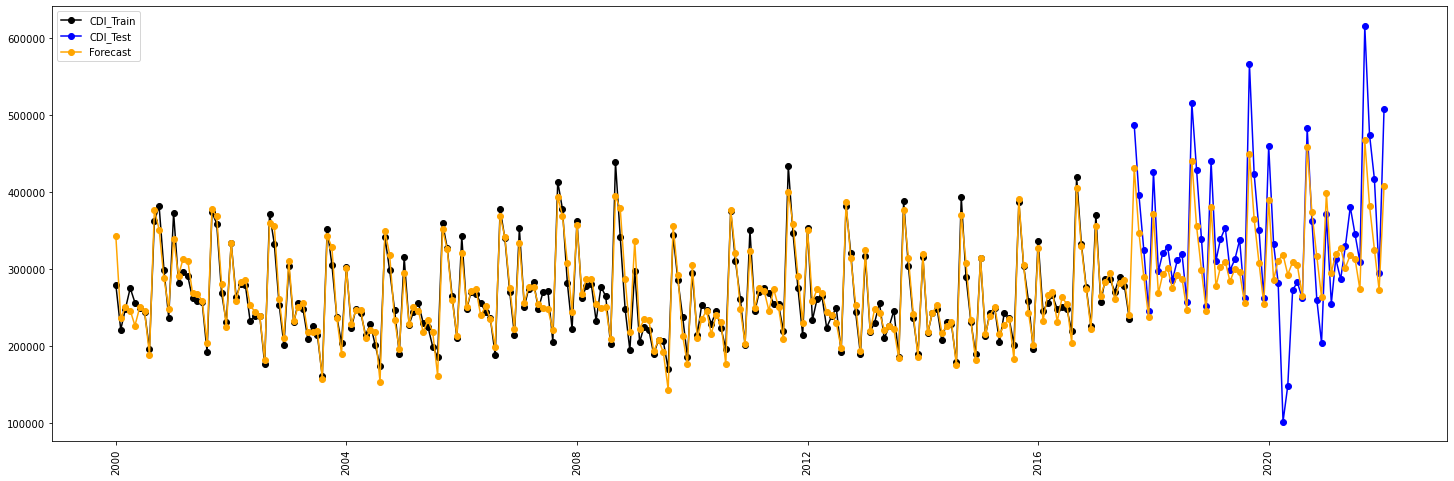

In [113]:
#Prediciton CDI
forecast_CDI = fit3.forecast(len(CDI_test))
full_curve = np.concatenate((fit3.fittedvalues, forecast_CDI))

plt.figure(figsize=(25,8))

plt.plot(CDI_train.index,CDI_train.values, marker="o", color="black", label='CDI_Train')
plt.plot(CDI_test.index,CDI_test.values, marker="o", color="blue", label='CDI_Test')
plt.plot(CDI.index,full_curve, marker="o", color="orange", label='Forecast')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [114]:
#Lissage par secteur en prenant en consideration leurs non saisonalité
fit3 = []
for secteur in range(4) :
    fit3.append( Holt(
        secteur_train[secteur],
        initialization_method = "estimated",
    ).fit( smoothing_level=0.2, smoothing_trend=0.2) )

/opt/anaconda3/envs/workshop/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/workshop/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/workshop/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/workshop/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so wil

/opt/anaconda3/envs/workshop/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


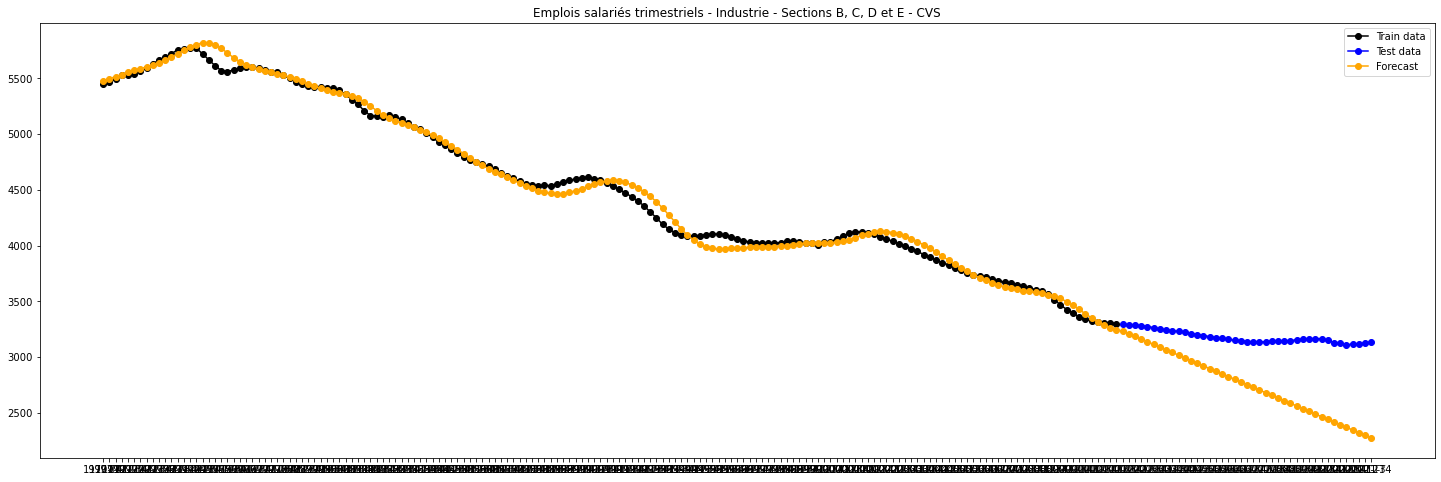

/opt/anaconda3/envs/workshop/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


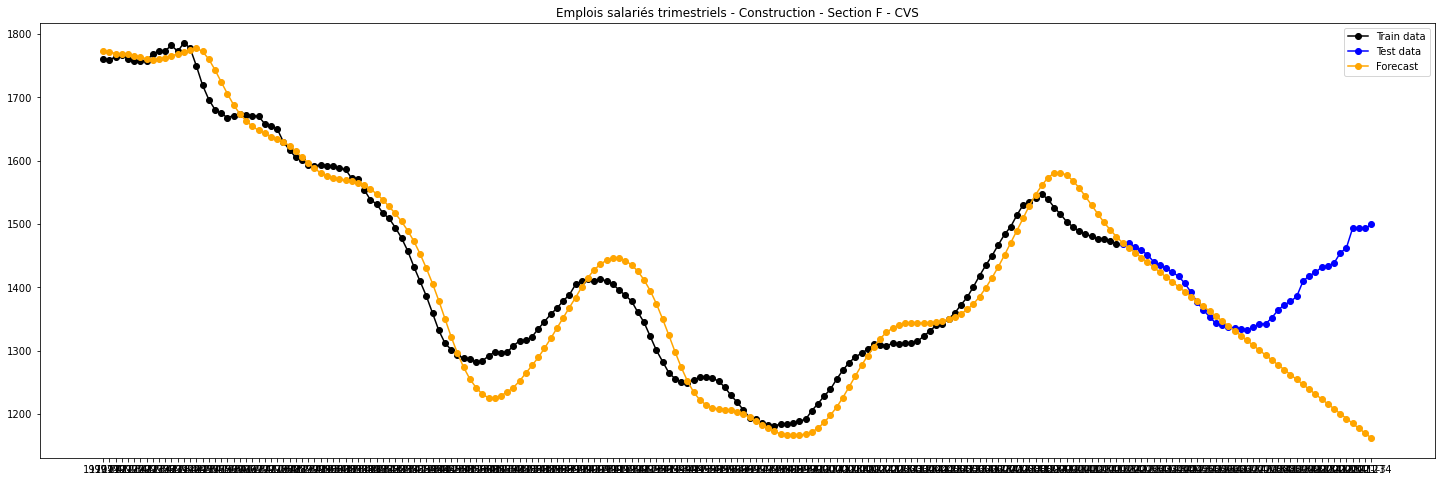

/opt/anaconda3/envs/workshop/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


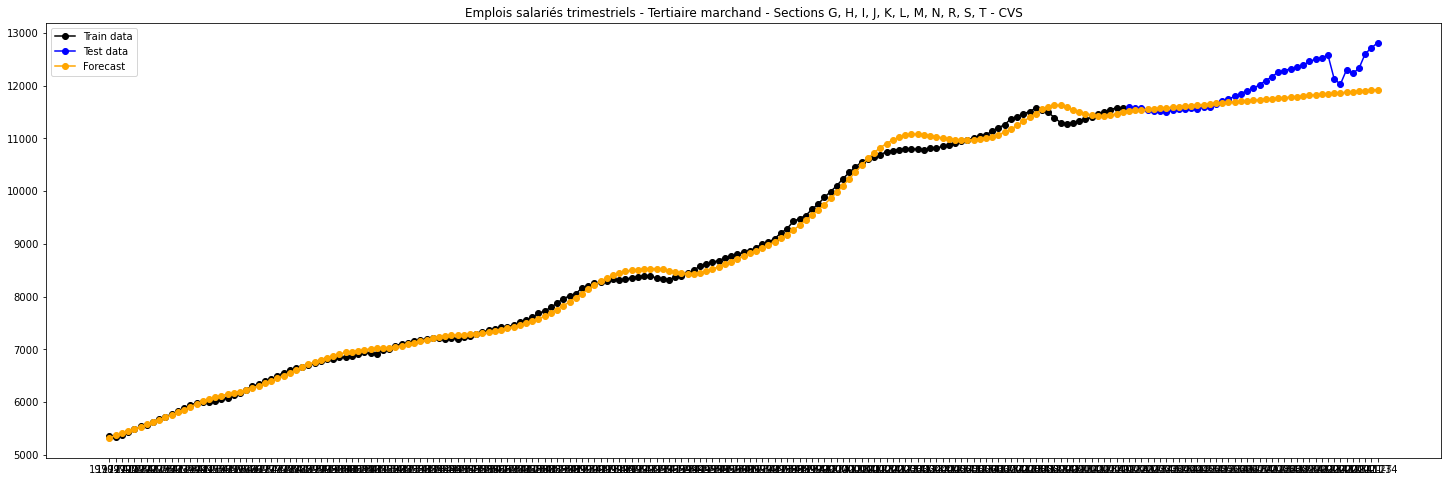

/opt/anaconda3/envs/workshop/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


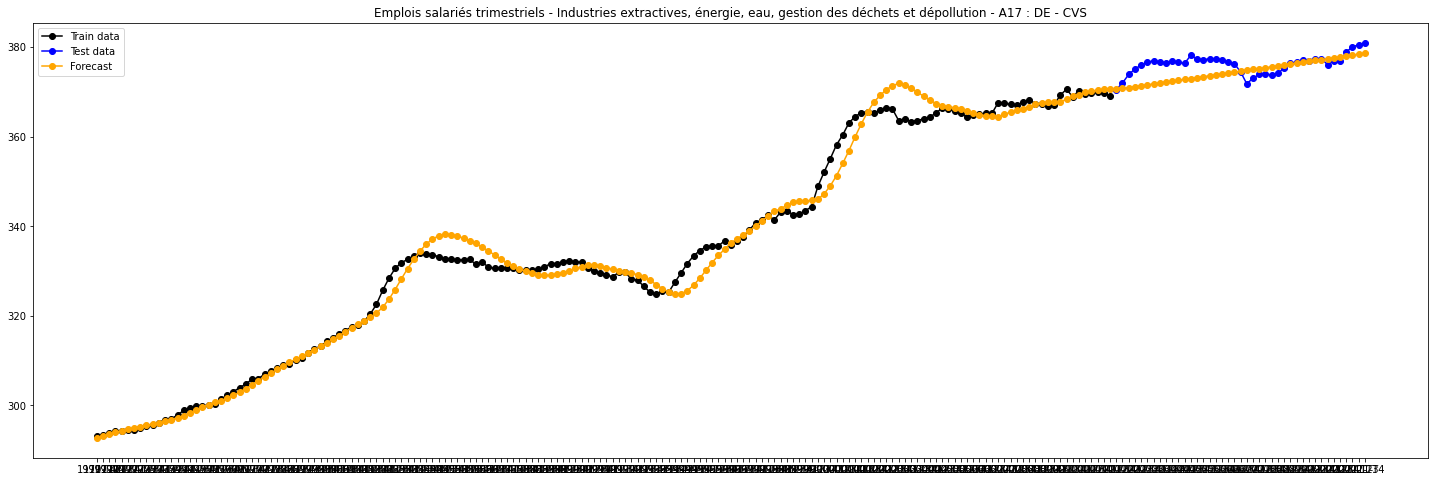

In [115]:
#Prediction et affichage d'un graph representatif
# Noir      : training set
# Blue      : test set
# Yellow    : prediction

forecast = []
for secteur in range(4) :
    forecast.append(fit3[secteur].forecast(len(secteur_test[secteur])))
    full_curve = np.concatenate((fit3[secteur].fittedvalues, forecast[secteur]))

    plt.figure(figsize=(25,8))

    plt.plot(secteur_train[secteur].index,secteur_train[secteur].values, marker="o", color="black", label="Train data")
    plt.plot(secteur_test[secteur].index,secteur_test[secteur].values, marker="o", color="blue", label='Test data')
    plt.plot(secteurs[secteur].index,full_curve, marker="o", color="orange", label='Forecast')
    plt.title(secteurs[secteur].name)
    plt.legend()
    plt.show()

<h1>Question 4 : Evaluation de la prédiction</h1>
<br>
Évaluation des prédictions par le calcul d’erreurs.

In [116]:
from sklearn.metrics import mean_squared_error
from math import sqrt


rmse_CDD=sqrt(mean_squared_error(CDD_test, forecast_CDD))
print("RMSE_CDD\n\t= ",rmse_CDD)


rmse_CDI=sqrt(mean_squared_error(CDI_test, forecast_CDI))
print("\nRMSE_CDI\n\t= ",rmse_CDI)


rmse_=[]
for secteur in range(4) :
    rmse_.append(sqrt(mean_squared_error(secteur_test[secteur], forecast[secteur])))
    print("\nRMSE "+secteurs[secteur].name,"\n\t= ",rmse_[secteur])

RMSE_CDD
	=  59527.64552672393

RMSE_CDI
	=  61481.8289370881

RMSE Emplois salariés trimestriels - Industrie - Sections B, C, D et E - CVS 
	=  488.19669052869295

RMSE Emplois salariés trimestriels - Construction - Section F - CVS 
	=  144.08973653090197

RMSE Emplois salariés trimestriels - Tertiaire marchand - Sections G, H, I, J, K, L, M, N, R, S, T - CVS 
	=  395.5533228045604

RMSE Emplois salariés trimestriels - Industries extractives, énergie, eau, gestion des déchets et dépollution - A17 : DE - CVS 
	=  2.8477555716563563


<h1>Question 5 : Application et évaluation d’autres modèles de prédiction </h1>
<br>
Prediction en utilisant le modele ARIMA

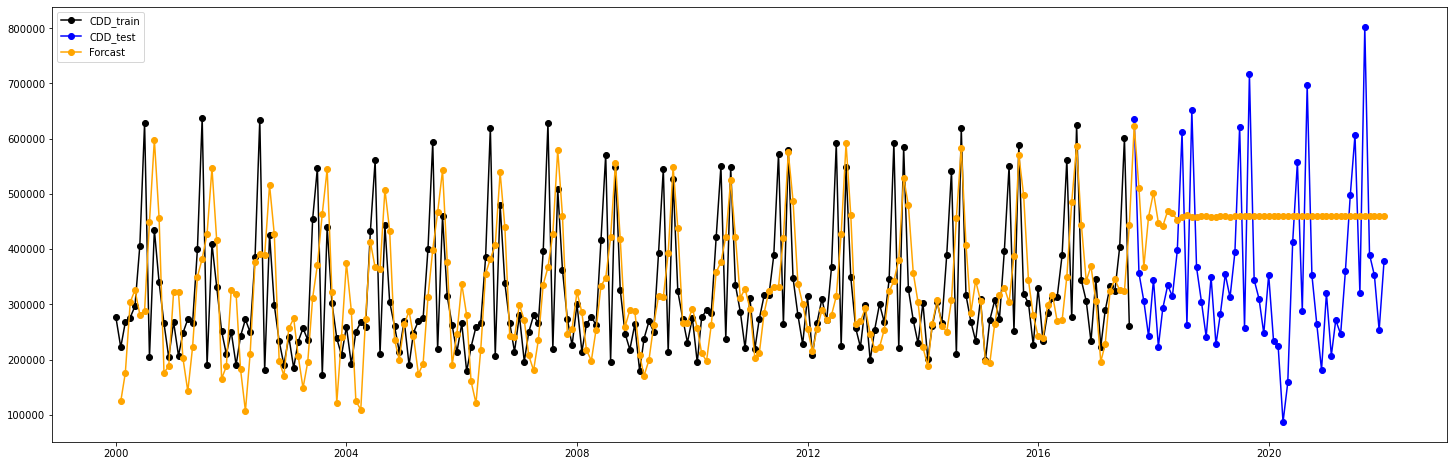

In [117]:
from statsmodels.tsa.arima.model import ARIMA

#CDD
model = ARIMA(CDD_train, order=(2,1,2))
CDD_ARIMA_model = model.fit()
forecast_CDD_ARIMA=CDD_ARIMA_model.forecast(len(CDD_test))
CDD_results = pd.concat([CDD_ARIMA_model.fittedvalues,forecast_CDD_ARIMA])
plt.figure(figsize=(25,8))
plt.plot(CDD_train, marker="o", color="black", label="CDD_train")
plt.plot(CDD_test, marker="o", color="blue", label='CDD_test')
plt.plot(CDD_results[1:], marker="o", color="orange", label='Forcast')
plt.legend()
plt.show()

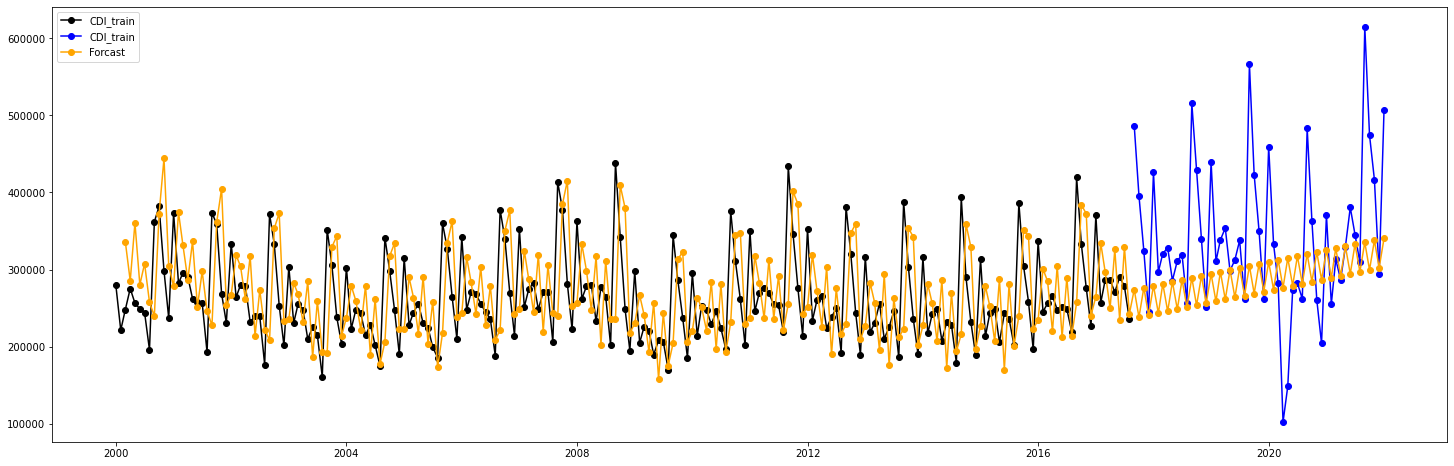

In [118]:
#CDI
model = ARIMA(CDI_train, order=(1,2,2))
CDI_ARIMA_model = model.fit()
forecast_CDI_ARIMA=CDI_ARIMA_model.forecast(len(CDI_test))
CDI_results = pd.concat([CDI_ARIMA_model.fittedvalues,forecast_CDI_ARIMA])
plt.figure(figsize=(25,8))
plt.plot(CDI_train, marker="o", color="black", label="CDI_train")
plt.plot(CDI_test, marker="o", color="blue", label='CDI_train')
plt.plot(CDI_results[2:], marker="o", color="orange", label='Forcast')
plt.legend()
plt.show()

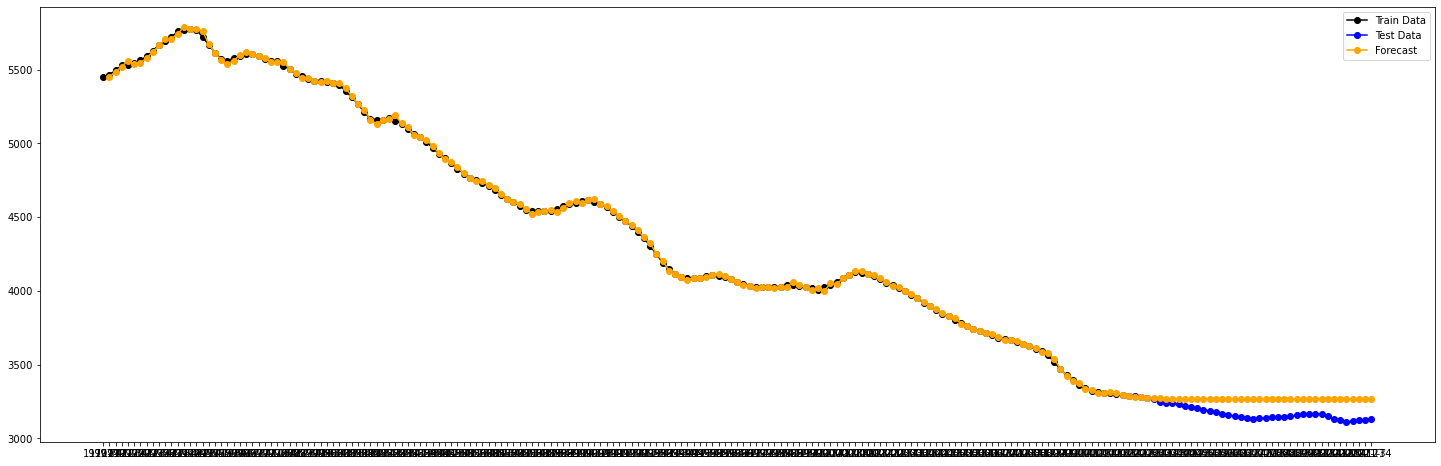

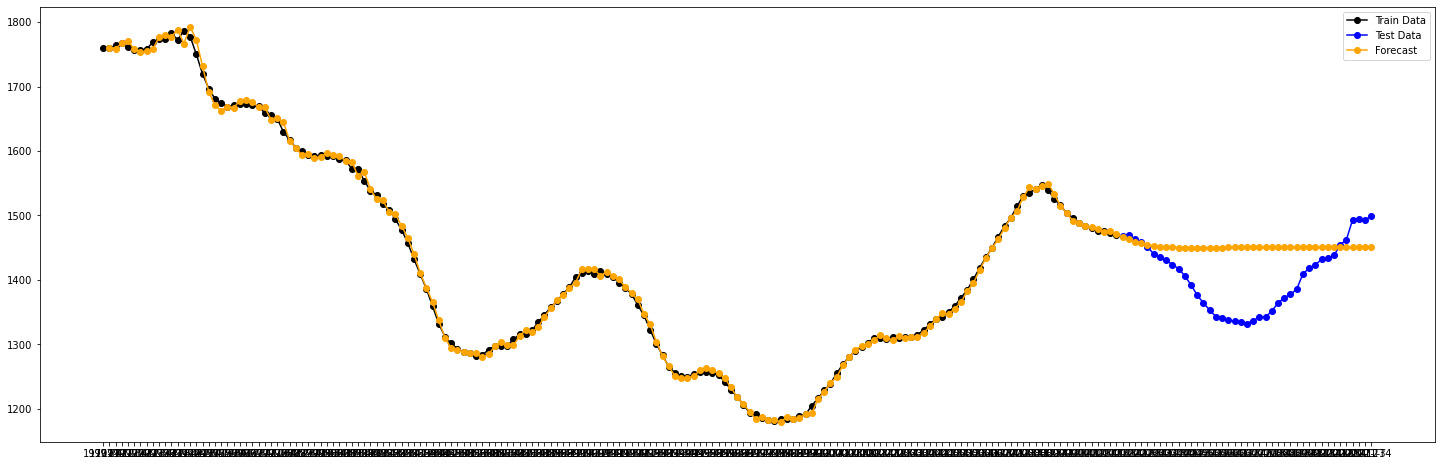

/opt/anaconda3/envs/workshop/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


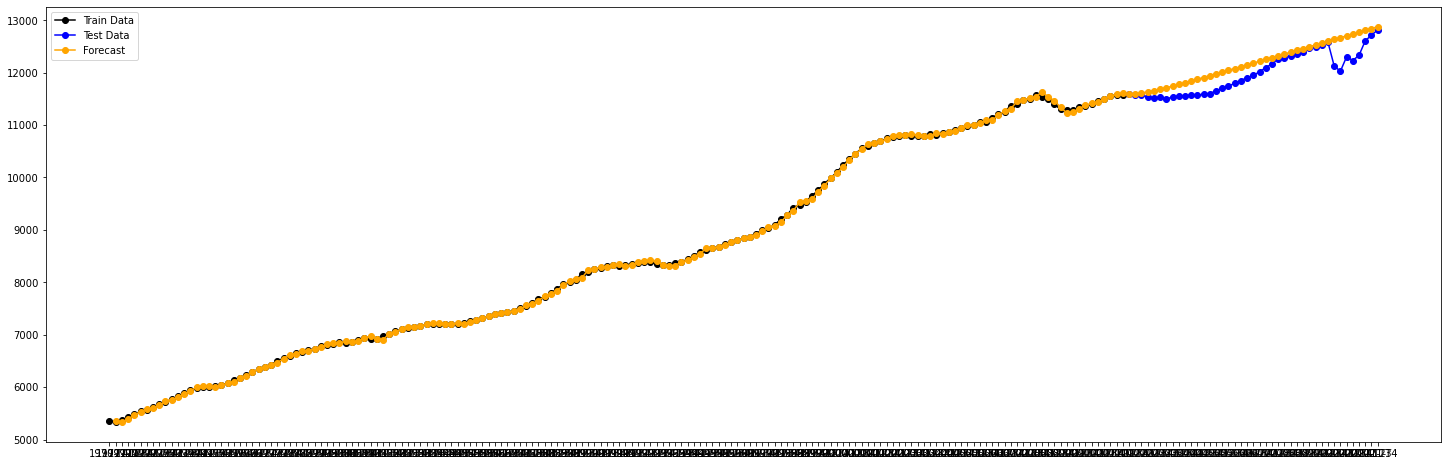

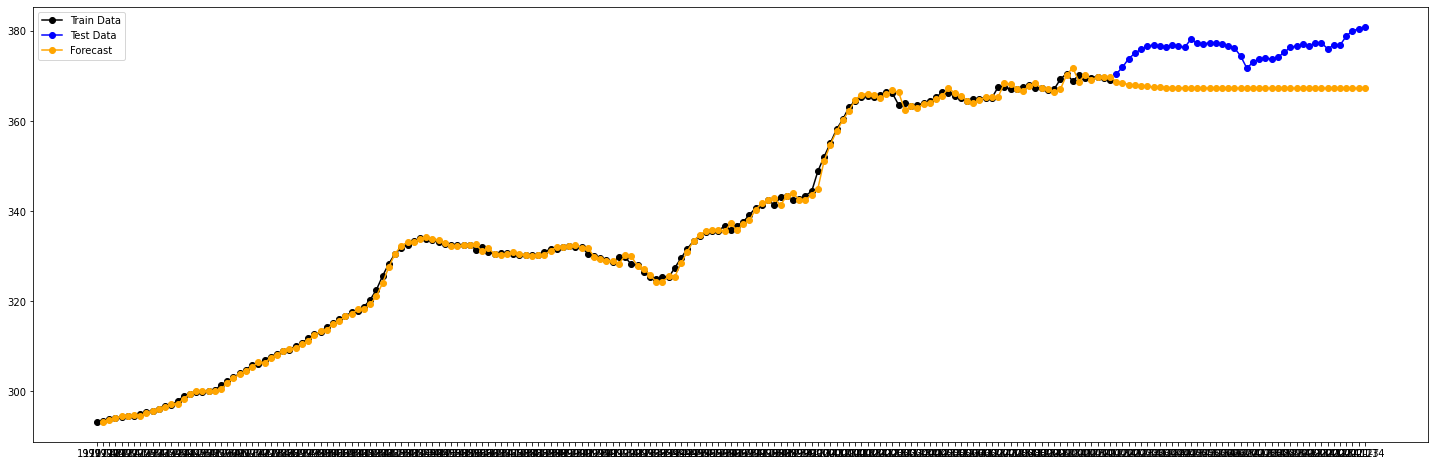

In [119]:
#secteurs

forecast_ARIMA = []
for secteur in range(4) :
   
    model = ARIMA(secteur_train[secteur].values, order=(2,1,3)).fit()
    forecast_ARIMA.append(model.forecast(len(secteur_test[secteur])))
    result = (np.concatenate([model.fittedvalues,  forecast_ARIMA[secteur] ]))

    plt.figure(figsize=(25,8))

    plt.plot(secteur_train[secteur].index,secteur_train[secteur].values, marker="o", color="black", label='Train Data')
    plt.plot(secteur_test[secteur].index,secteur_test[secteur].values, marker="o", color="blue", label='Test Data')
    plt.plot(secteurs[secteur].index[1:],result[1:], marker="o",color="orange", label='Forecast')
    plt.legend()
    plt.show()

In [120]:
#Erreur RMSE du modele ARIMA sur le CDD et CDI

rmse_CDD_ARIMA=sqrt(mean_squared_error(CDD_test, forecast_CDD_ARIMA))
rmse_CDI_ARIMA=sqrt(mean_squared_error(CDI_test, forecast_CDI_ARIMA))
#Erreur RMSE du modele ARIMA sur nos 4 secteurs

rmse_arima=[]
for secteur in range(4):
    rmse_arima.append(sqrt(mean_squared_error(secteur_test[secteur], forecast_ARIMA[secteur])))

In [121]:
#On affiche et compare les RMSE pour la methode de lissage et pour ARIMA
print("RMSE CDD exponential smoothing :",rmse_CDD)
print("RMSE CDD ARIMA :",rmse_CDD_ARIMA)
print("\nRMSE CDI exponential smoothing :",rmse_CDI)
print("RMSE CDI ARIMA :",rmse_CDI_ARIMA)
for secteur in range(4):
    print(f"\nRMSE exponential smoothing {secteurs[secteur].name}:",rmse_[secteur])
    print("RMSE ARIMA {secteurs[secteur].name}:",rmse_arima[secteur])

RMSE CDD exponential smoothing : 59527.64552672393
RMSE CDD ARIMA : 179826.93447970273

RMSE CDI exponential smoothing : 61481.8289370881
RMSE CDI ARIMA : 107382.43258023725

RMSE exponential smoothing Emplois salariés trimestriels - Industrie - Sections B, C, D et E - CVS: 488.19669052869295
RMSE ARIMA {secteurs[secteur].name}: 99.81000351565257

RMSE exponential smoothing Emplois salariés trimestriels - Construction - Section F - CVS: 144.08973653090197
RMSE ARIMA {secteurs[secteur].name}: 67.75518438491032

RMSE exponential smoothing Emplois salariés trimestriels - Tertiaire marchand - Sections G, H, I, J, K, L, M, N, R, S, T - CVS: 395.5533228045604
RMSE ARIMA {secteurs[secteur].name}: 253.507499784883

RMSE exponential smoothing Emplois salariés trimestriels - Industries extractives, énergie, eau, gestion des déchets et dépollution - A17 : DE - CVS: 2.8477555716563563
RMSE ARIMA {secteurs[secteur].name}: 9.041052357917598


<h3>Interpretation :</h3>
<ul> 
    <li>DPAE (CDD et CDI) :</li>
    <p>En comparant les valeurs des RMSE respectifs on peut dire que la méthode du lissage donne de bien meilleur résultats</p>
    <li>EESSA :</li>
    <ul>
        <li>Secteur 1 : Emplois salariés trimestriels - Industrie - Sections B, C, D et E - CVS :</li>
        <li>Secteur 2 : Emplois salariés trimestriels - Construction - Section F - CVS :</li>
        <li>Secteur 3 : Emplois salariés trimestriels - Tertiaire marchand - Sections G, H, I, J, K, L, M, N, R, S, T - CVS :</li>
        <p>D'après les valeurs des RMSE, pour ces 3 secteurs ARIMA présente une valeur inférieure à celle presentée par le lissage. On en conclut que le ARIMA est mieux adapté</p>
        <li>Secteur 4 : Emplois salariés trimestriels - Industries extractives, énergie, eau, gestion des déchets et dépollution - A17 : DE - CVS :</li>
        <p>Ici les deux erreurs sont faibles, mais le lissage exponentiel l'emporte</p>
    </ul>
</ul>
<p>En général on observe que pour la prédiction du DPAE on a de meilleurs résultats à l'aide du lissage exponentiel. Pour l'EESSA on a une meilleure prédiciton à l'aide du modèle ARIMA</p>

<h1>Question 6 : Bonus cadeau </h1>

In [122]:

model = ExponentialSmoothing(
    CDD,
    seasonal_periods = 12,
    trend = "add",
    seasonal = "add",
    use_boxcox = False,
    initialization_method = "estimated",
).fit()
prediction_CDD= model.forecast(4)
print(prediction_CDD)


model = ExponentialSmoothing(
    CDI,
    seasonal_periods = 12,
    trend = "add",
    seasonal = "add",
    use_boxcox = False,
    initialization_method = "estimated",
).fit()
prediction_CDI= model.forecast(4)
print(prediction_CDI)

prediction_secteur=[]
for secteur in range(4) :
    model = ARIMA(secteurs[secteur].values, order=(2,1,3)).fit()
    prediction_secteur.append(model.forecast(1)[0])


/opt/anaconda3/envs/workshop/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/opt/anaconda3/envs/workshop/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


2022-02-01    268945.372203
2022-03-01    314001.834183
2022-04-01    280873.091787
2022-05-01    357596.391933
Freq: MS, dtype: float64
2022-02-01    378221.369154
2022-03-01    395615.472109
2022-04-01    348182.301311
2022-05-01    375910.181913
Freq: MS, dtype: float64


In [123]:
print(" CDD : ".center(30,"=")+"\nLes predicitons pour fevrier-mai sont :")
print(prediction_CDD)
print(" CDI : ".center(30,"=")+"\nLes predicitons pour fevrier-mai sont :")
print(prediction_CDI)
print("\n")
for secteur in range(4):
    print(f" Secteur {secteur+1} : ".center(30,"=")+f"\nLes predicitons {secteurs[secteur].name} :")
    print(prediction_secteur[secteur])

=========== CDD : ============
Les predicitons pour fevrier-mai sont :
2022-02-01    268945.372203
2022-03-01    314001.834183
2022-04-01    280873.091787
2022-05-01    357596.391933
Freq: MS, dtype: float64
=========== CDI : ============
Les predicitons pour fevrier-mai sont :
2022-02-01    378221.369154
2022-03-01    395615.472109
2022-04-01    348182.301311
2022-05-01    375910.181913
Freq: MS, dtype: float64


======== Secteur 1 : =========
Les predicitons Emplois salariés trimestriels - Industrie - Sections B, C, D et E - CVS :
3133.151989635695
======== Secteur 2 : =========
Les predicitons Emplois salariés trimestriels - Construction - Section F - CVS :
1498.677995140913
======== Secteur 3 : =========
Les predicitons Emplois salariés trimestriels - Tertiaire marchand - Sections G, H, I, J, K, L, M, N, R, S, T - CVS :
12938.54904961897
======== Secteur 4 : =========
Les predicitons Emplois salariés trimestriels - Industries extractives, énergie, eau, gestion des déchets et dépoll